In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [37]:
player_agg = pd.read_csv('/Users/apple/Downloads/International Football Match Features & StatisticsInternational/player_aggregates.csv')
teams_form = pd.read_csv('/Users/apple/Downloads/International Football Match Features & StatisticsInternational/teams_form.csv')
match_features = pd.read_csv('/Users/apple/Downloads/International Football Match Features & StatisticsInternational/teams_match_features.csv')

print("Datasets loaded successfully!")
print(f"\nPlayer Aggregates shape: {player_agg.shape}")
print(f"Teams Form shape: {teams_form.shape}")
print(f"Match Features shape: {match_features.shape}")


Datasets loaded successfully!

Player Aggregates shape: (1599, 13)
Teams Form shape: (102094, 5)
Match Features shape: (43364, 35)


In [38]:
player_agg.head(20)

,country,fifa_version,num_players,avg_overall,max_overall,avg_pace,avg_shooting,avg_passing,avg_dribbling,avg_defending,avg_physic,avg_attack_overall,avg_defense_overall
0,Afghanistan,17,1,54.000000,54,69.000000,52.000000,44.000000,58.000000,18.000000,48.000000,54.000000,54.000000
1,Afghanistan,18,3,56.333333,60,66.000000,44.333333,55.333333,60.000000,41.666667,53.333333,56.333333,50.000000
2,Afghanistan,19,3,60.666667,63,71.666667,49.000000,54.000000,61.000000,50.333333,57.000000,60.666667,60.500000
3,Afghanistan,20,2,62.000000,64,71.000000,48.000000,58.000000,63.000000,55.000000,59.500000,62.000000,62.000000
4,Afghanistan,21,2,66.000000,68,80.500000,53.500000,57.000000,68.500000,46.000000,50.500000,64.000000,68.000000
5,Afghanistan,22,1,64.000000,64,82.000000,60.000000,55.000000,68.000000,31.000000,43.000000,64.000000,64.000000
6,Afghanistan,23,1,63.000000,63,80.000000,50.000000,58.000000,65.000000,58.000000,63.000000,63.000000,63.000000
7,Albania,15,14,69.857143,77,68.166667,59.666667,60.750000,65.083333,53.166667,68.000000,68.800000,70.500000
8,Albania,16,14,70.928571,75,69.923077,61.384615,64.692308,66.153846,56.538462,71.076923,70.600000,71.000000
9,Albania,17,14,72.142857,79,73.076923,58.692308,62.615385,67.307692,56.461538,71.000000,71.250000,72.875000


In [39]:
teams_form.head(20)

,team,match_date,avg_goals_scored,avg_goals_conceded,win_rate
0,Afghanistan,1941-08-24,1.500000,1.500000,0.33
1,Afghanistan,1941-08-31,0.000000,0.000000,0.00
2,Afghanistan,1948-06-03,0.500000,1.500000,0.00
3,Afghanistan,1948-07-26,0.333333,2.333333,0.00
4,Afghanistan,1949-10-26,0.250000,3.250000,0.00
5,Afghanistan,1951-03-07,0.200000,3.400000,0.00
6,Afghanistan,1951-03-09,0.200000,4.000000,0.00
7,Afghanistan,1954-05-04,0.000000,3.800000,0.00
8,Afghanistan,1954-05-06,0.400000,4.600000,0.00
9,Afghanistan,1959-08-27,0.800000,4.200000,0.00


In [40]:
match_features.head(20)

,home_elo,away_elo,elo_diff,home_avg_overall,home_max_overall,home_avg_attack,home_avg_defense,home_avg_pace,home_avg_shooting,home_avg_passing,...,away_form_win_rate,is_neutral,is_world_cup,is_continental,home_goals,away_goals,_home_team,_away_team,_date,_tournament
0,1500.000000,1500.000000,0.000000,74.285714,76,74.500000,74.250000,71.083333,69.500000,69.583333,...,0.330000,0,0,0,0,0,Scotland,England,1872-11-30,Friendly
1,1500.000000,1500.000000,0.000000,81.500000,86,82.250000,81.222222,73.538462,69.923077,71.307692,...,0.000000,0,0,0,4,2,England,Scotland,1873-03-08,Friendly
2,1484.000000,1516.000000,-32.000000,74.285714,76,74.500000,74.250000,71.083333,69.500000,69.583333,...,0.500000,0,0,0,2,1,Scotland,England,1874-03-07,Friendly
3,1498.530498,1501.469502,-2.939003,81.500000,86,82.250000,81.222222,73.538462,69.923077,71.307692,...,0.333333,0,0,0,2,2,England,Scotland,1875-03-06,Friendly
4,1501.334159,1498.665841,2.668317,74.285714,76,74.500000,74.250000,71.083333,69.500000,69.583333,...,0.250000,0,0,0,3,0,Scotland,England,1876-03-04,Friendly
5,1517.211281,1500.000000,17.211281,74.285714,76,74.500000,74.250000,71.083333,69.500000,69.583333,...,0.330000,0,0,0,4,0,Scotland,Wales,1876-03-25,Friendly
6,1482.788719,1532.419319,-49.630600,81.500000,86,82.250000,81.222222,73.538462,69.923077,71.307692,...,0.600000,0,0,0,1,3,England,Scotland,1877-03-03,Friendly
7,1484.791961,1546.149166,-61.357205,74.642857,87,76.333333,74.000000,70.250000,56.000000,68.583333,...,0.800000,0,0,0,0,2,Wales,Scotland,1877-03-05,Friendly
8,1559.352575,1469.058873,90.293703,74.285714,76,74.500000,74.250000,71.083333,69.500000,69.583333,...,0.200000,0,0,0,7,2,Scotland,England,1878-03-02,Friendly
9,1571.285550,1471.588552,99.696998,74.285714,76,74.500000,74.250000,71.083333,69.500000,69.583333,...,0.000000,0,0,0,9,0,Scotland,Wales,1878-03-23,Friendly


In [41]:
print("=" * 60)
print("PLAYER AGGREGATES DATASET")
print("=" * 60)
print(player_agg.head())
print("\n")
print(player_agg.info())
print("\n")
print(player_agg.describe())


PLAYER AGGREGATES DATASET
       country  fifa_version  num_players  avg_overall  max_overall  \
0  Afghanistan            17            1    54.000000           54   
1  Afghanistan            18            3    56.333333           60   
2  Afghanistan            19            3    60.666667           63   
3  Afghanistan            20            2    62.000000           64   
4  Afghanistan            21            2    66.000000           68   

    avg_pace  avg_shooting  avg_passing  avg_dribbling  avg_defending  \
0  69.000000     52.000000    44.000000           58.0      18.000000   
1  66.000000     44.333333    55.333333           60.0      41.666667   
2  71.666667     49.000000    54.000000           61.0      50.333333   
3  71.000000     48.000000    58.000000           63.0      55.000000   
4  80.500000     53.500000    57.000000           68.5      46.000000   

   avg_physic  avg_attack_overall  avg_defense_overall  
0   48.000000           54.000000                 5

In [42]:
print("=" * 60)
print("TEAMS FORM DATASET")
print("=" * 60)
print(teams_form.head())
print("\n")
print(teams_form.info())
print("\n")
print(teams_form.describe())


TEAMS FORM DATASET
          team  match_date  avg_goals_scored  avg_goals_conceded  win_rate
0  Afghanistan  1941-08-24          1.500000            1.500000      0.33
1  Afghanistan  1941-08-31          0.000000            0.000000      0.00
2  Afghanistan  1948-06-03          0.500000            1.500000      0.00
3  Afghanistan  1948-07-26          0.333333            2.333333      0.00
4  Afghanistan  1949-10-26          0.250000            3.250000      0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102094 entries, 0 to 102093
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   team                102094 non-null  object 
 1   match_date          102094 non-null  object 
 2   avg_goals_scored    102094 non-null  float64
 3   avg_goals_conceded  102094 non-null  float64
 4   win_rate            102094 non-null  float64
dtypes: float64(3), object(2)
memory usage: 3.9+ MB
None


       avg

In [43]:
print("=" * 60)
print("MATCH FEATURES DATASET")
print("=" * 60)
print(match_features.head())
print("\n")
print(match_features.info())
print("\n")
print(match_features.describe())


MATCH FEATURES DATASET
      home_elo     away_elo   elo_diff  home_avg_overall  home_max_overall  \
0  1500.000000  1500.000000   0.000000         74.285714                76   
1  1500.000000  1500.000000   0.000000         81.500000                86   
2  1484.000000  1516.000000 -32.000000         74.285714                76   
3  1498.530498  1501.469502  -2.939003         81.500000                86   
4  1501.334159  1498.665841   2.668317         74.285714                76   

   home_avg_attack  home_avg_defense  home_avg_pace  home_avg_shooting  \
0            74.50         74.250000      71.083333          69.500000   
1            82.25         81.222222      73.538462          69.923077   
2            74.50         74.250000      71.083333          69.500000   
3            82.25         81.222222      73.538462          69.923077   
4            74.50         74.250000      71.083333          69.500000   

   home_avg_passing  ...  away_form_win_rate  is_neutral  is_wo

In [44]:
print("Missing values in Player Aggregates:")
print(player_agg.isnull().sum())
print("\nMissing values in Teams Form:")
print(teams_form.isnull().sum())
print("\nMissing values in Match Features:")
print(match_features.isnull().sum())


Missing values in Player Aggregates:
country                 0
fifa_version            0
num_players             0
avg_overall             0
max_overall             0
avg_pace               16
avg_shooting           16
avg_passing            16
avg_dribbling          16
avg_defending          16
avg_physic             16
avg_attack_overall      0
avg_defense_overall     0
dtype: int64

Missing values in Teams Form:
team                  0
match_date            0
avg_goals_scored      0
avg_goals_conceded    0
win_rate              0
dtype: int64

Missing values in Match Features:
home_elo                0
away_elo                0
elo_diff                0
home_avg_overall        0
home_max_overall        0
home_avg_attack         0
home_avg_defense        0
home_avg_pace         697
home_avg_shooting     697
home_avg_passing      697
away_avg_overall        0
away_max_overall        0
away_avg_attack         0
away_avg_defense        0
away_avg_pace         801
away_avg_shooting     8

In [45]:
teams_form['match_date'] = pd.to_datetime(teams_form['match_date'])
match_features['_date'] = pd.to_datetime(match_features['_date'])

teams_form['year'] = teams_form['match_date'].dt.year
match_features['year'] = match_features['_date'].dt.year

print("Date columns converted successfully!")
print(f"Date range in teams_form: {teams_form['match_date'].min()} to {teams_form['match_date'].max()}")
print(f"Date range in match_features: {match_features['_date'].min()} to {match_features['_date'].max()}")


Date columns converted successfully!
Date range in teams_form: 1872-11-30 00:00:00 to 2025-12-11 00:00:00
Date range in match_features: 1872-11-30 00:00:00 to 2025-12-11 00:00:00


In [46]:
match_features['home_result'] = match_features.apply(
    lambda x: 'Win' if x['home_goals'] > x['away_goals'] 
    else ('Draw' if x['home_goals'] == x['away_goals'] else 'Loss'), axis=1
)


match_features['total_goals'] = match_features['home_goals'] + match_features['away_goals']


match_features['goal_diff'] = match_features['home_goals'] - match_features['away_goals']

print("Additional features created!")
print(match_features[['home_goals', 'away_goals', 'home_result', 'total_goals', 'goal_diff']].head())


Additional features created!
   home_goals  away_goals home_result  total_goals  goal_diff
0           0           0        Draw            0          0
1           4           2         Win            6          2
2           2           1         Win            3          1
3           2           2        Draw            4          0
4           3           0         Win            3          3


In [47]:
result_counts = match_features['home_result'].value_counts()
print("Match Results Distribution:")
print(result_counts)
print(f"\nWin Rate: {result_counts['Win'] / len(match_features) * 100:.2f}%")
print(f"Draw Rate: {result_counts['Draw'] / len(match_features) * 100:.2f}%")
print(f"Loss Rate: {result_counts['Loss'] / len(match_features) * 100:.2f}%")

Match Results Distribution:
home_result
Win     24491
Draw    10174
Loss     8699
Name: count, dtype: int64

Win Rate: 56.48%
Draw Rate: 23.46%
Loss Rate: 20.06%


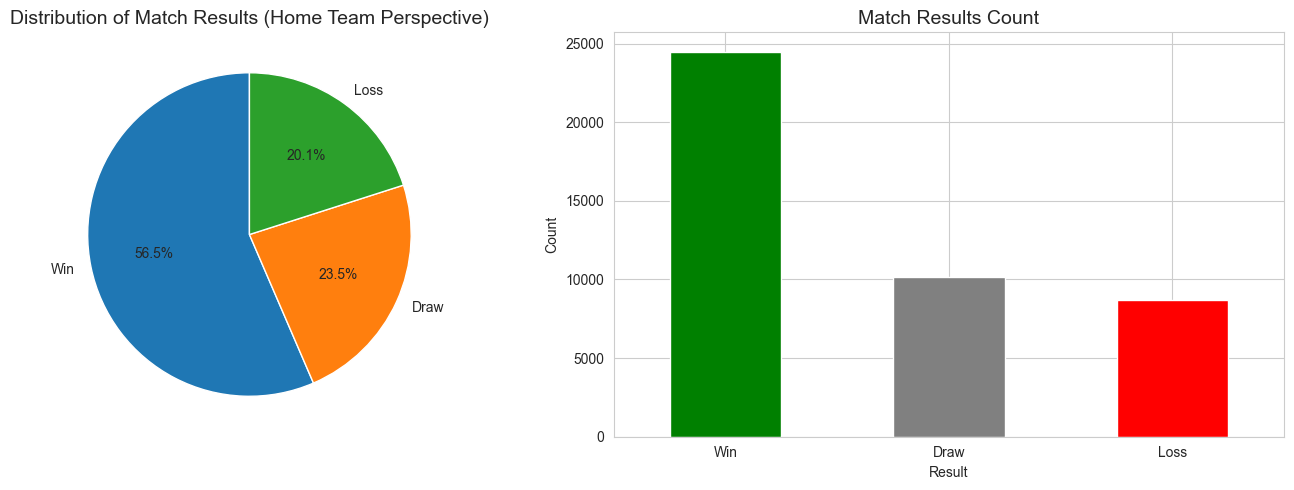

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


result_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of Match Results (Home Team Perspective)', fontsize=14)
axes[0].set_ylabel('')


result_counts.plot(kind='bar', ax=axes[1], color=['green', 'gray', 'red'])
axes[1].set_title('Match Results Count', fontsize=14)
axes[1].set_xlabel('Result')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


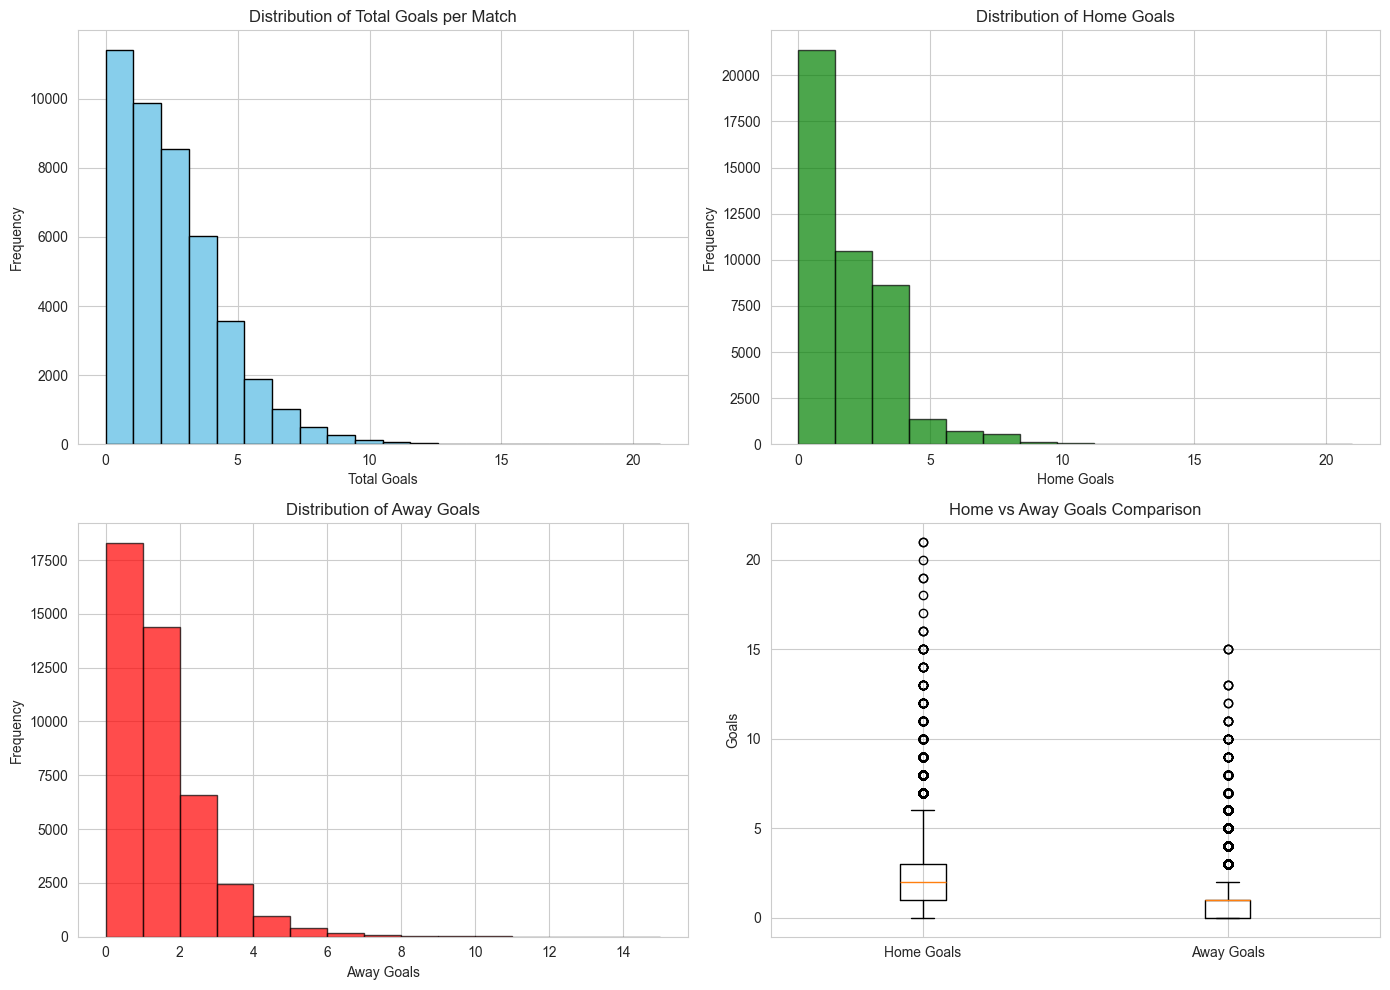

Average total goals per match: 2.84
Average home goals: 1.85
Average away goals: 0.99


In [49]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))


axes[0, 0].hist(match_features['total_goals'], bins=20, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Distribution of Total Goals per Match', fontsize=12)
axes[0, 0].set_xlabel('Total Goals')
axes[0, 0].set_ylabel('Frequency')


axes[0, 1].hist(match_features['home_goals'], bins=15, edgecolor='black', color='green', alpha=0.7)
axes[0, 1].set_title('Distribution of Home Goals', fontsize=12)
axes[0, 1].set_xlabel('Home Goals')
axes[0, 1].set_ylabel('Frequency')


axes[1, 0].hist(match_features['away_goals'], bins=15, edgecolor='black', color='red', alpha=0.7)
axes[1, 0].set_title('Distribution of Away Goals', fontsize=12)
axes[1, 0].set_xlabel('Away Goals')
axes[1, 0].set_ylabel('Frequency')

box_data = [match_features['home_goals'], match_features['away_goals']]
axes[1, 1].boxplot(box_data, labels=['Home Goals', 'Away Goals'])
axes[1, 1].set_title('Home vs Away Goals Comparison', fontsize=12)
axes[1, 1].set_ylabel('Goals')

plt.tight_layout()
plt.show()

print(f"Average total goals per match: {match_features['total_goals'].mean():.2f}")
print(f"Average home goals: {match_features['home_goals'].mean():.2f}")
print(f"Average away goals: {match_features['away_goals'].mean():.2f}")

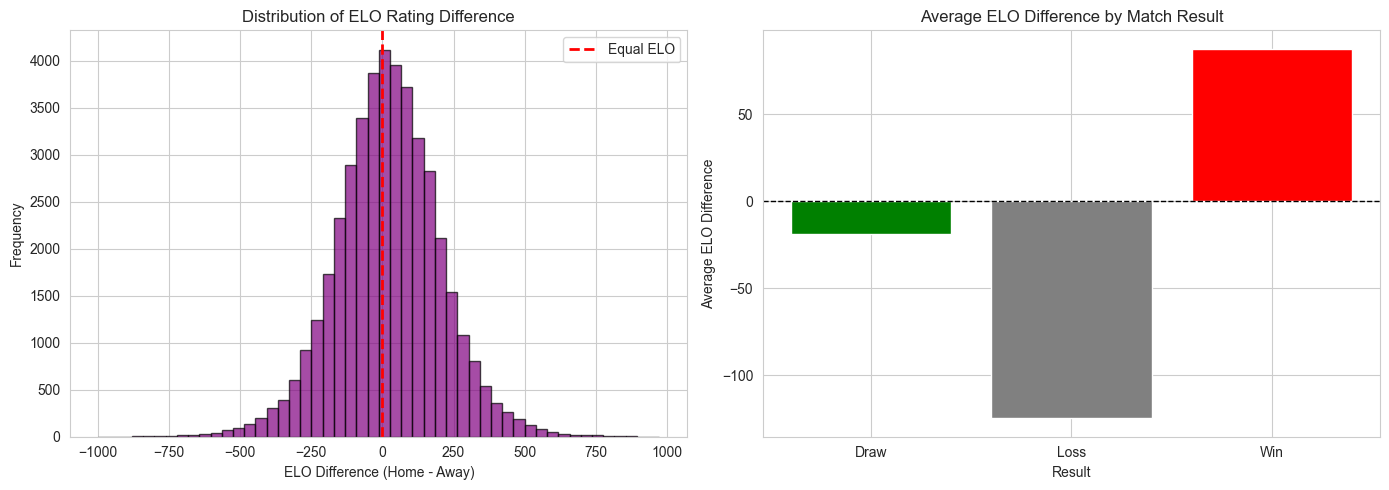


Average ELO difference by result:
home_result
Draw    -18.956608
Loss   -124.614225
Win      87.498404
Name: elo_diff, dtype: float64


In [50]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].hist(match_features['elo_diff'], bins=50, edgecolor='black', color='purple', alpha=0.7)
axes[0].set_title('Distribution of ELO Rating Difference', fontsize=12)
axes[0].set_xlabel('ELO Difference (Home - Away)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Equal ELO')
axes[0].legend()


elo_by_result = match_features.groupby('home_result')['elo_diff'].mean()
axes[1].bar(elo_by_result.index, elo_by_result.values, color=['green', 'gray', 'red'])
axes[1].set_title('Average ELO Difference by Match Result', fontsize=12)
axes[1].set_xlabel('Result')
axes[1].set_ylabel('Average ELO Difference')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

print("\nAverage ELO difference by result:")
print(elo_by_result)


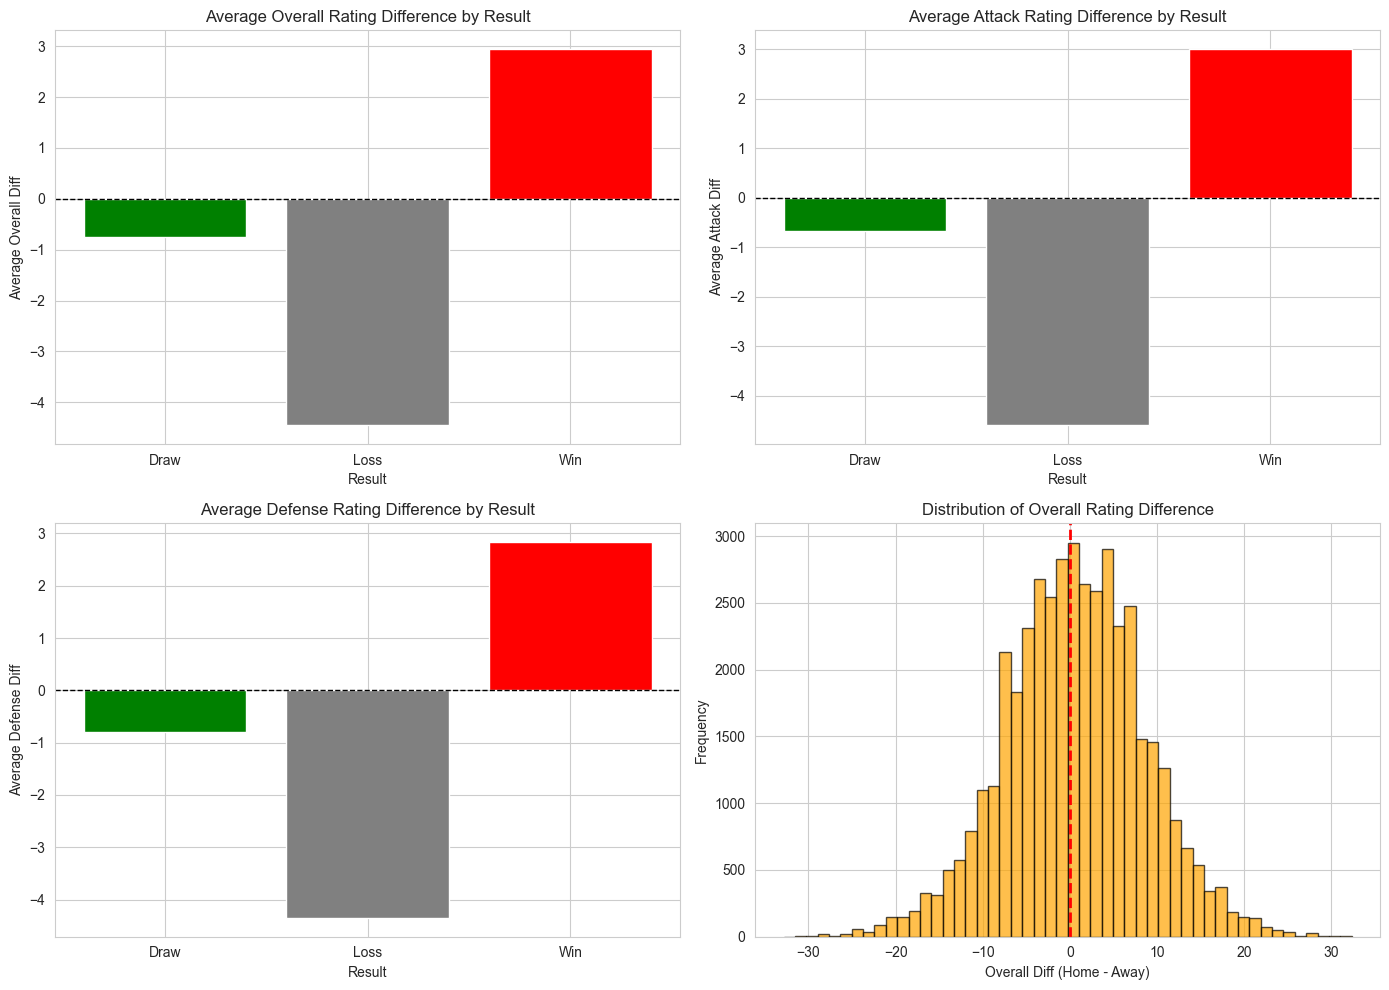

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))


overall_by_result = match_features.groupby('home_result')['overall_diff'].mean()
axes[0, 0].bar(overall_by_result.index, overall_by_result.values, color=['green', 'gray', 'red'])
axes[0, 0].set_title('Average Overall Rating Difference by Result', fontsize=12)
axes[0, 0].set_xlabel('Result')
axes[0, 0].set_ylabel('Average Overall Diff')
axes[0, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)

attack_by_result = match_features.groupby('home_result')['attack_diff'].mean()
axes[0, 1].bar(attack_by_result.index, attack_by_result.values, color=['green', 'gray', 'red'])
axes[0, 1].set_title('Average Attack Rating Difference by Result', fontsize=12)
axes[0, 1].set_xlabel('Result')
axes[0, 1].set_ylabel('Average Attack Diff')
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)


defense_by_result = match_features.groupby('home_result')['defense_diff'].mean()
axes[1, 0].bar(defense_by_result.index, defense_by_result.values, color=['green', 'gray', 'red'])
axes[1, 0].set_title('Average Defense Rating Difference by Result', fontsize=12)
axes[1, 0].set_xlabel('Result')
axes[1, 0].set_ylabel('Average Defense Diff')
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)


axes[1, 1].hist(match_features['overall_diff'], bins=50, edgecolor='black', color='orange', alpha=0.7)
axes[1, 1].set_title('Distribution of Overall Rating Difference', fontsize=12)
axes[1, 1].set_xlabel('Overall Diff (Home - Away)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()


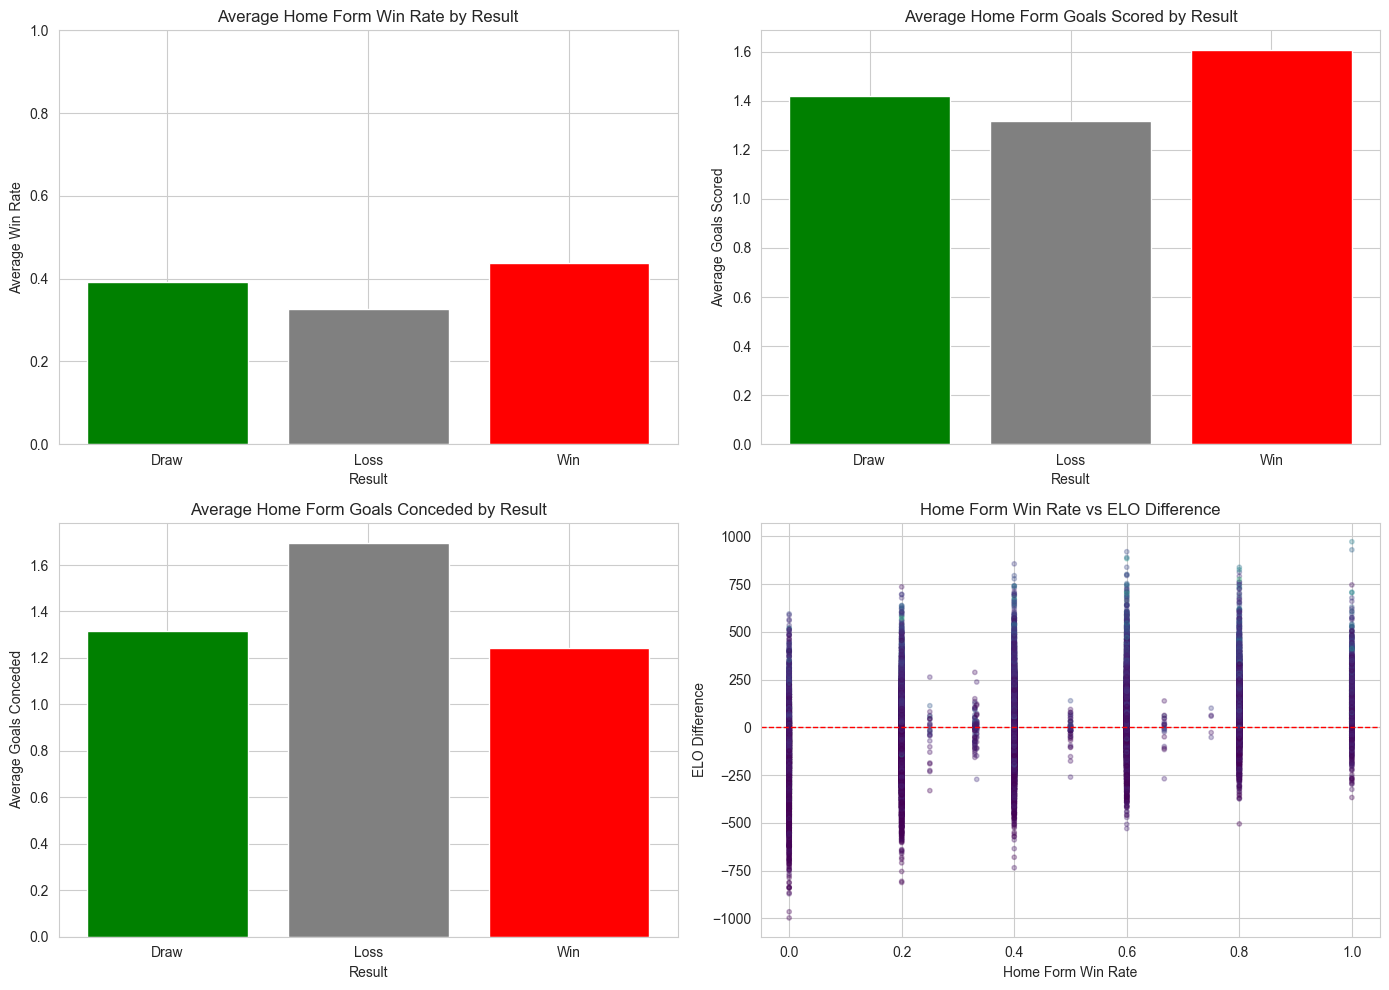

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

form_win_by_result = match_features.groupby('home_result')['home_form_win_rate'].mean()
axes[0, 0].bar(form_win_by_result.index, form_win_by_result.values, color=['green', 'gray', 'red'])
axes[0, 0].set_title('Average Home Form Win Rate by Result', fontsize=12)
axes[0, 0].set_xlabel('Result')
axes[0, 0].set_ylabel('Average Win Rate')
axes[0, 0].set_ylim([0, 1])

form_scored_by_result = match_features.groupby('home_result')['home_form_scored'].mean()
axes[0, 1].bar(form_scored_by_result.index, form_scored_by_result.values, color=['green', 'gray', 'red'])
axes[0, 1].set_title('Average Home Form Goals Scored by Result', fontsize=12)
axes[0, 1].set_xlabel('Result')
axes[0, 1].set_ylabel('Average Goals Scored')


form_conceded_by_result = match_features.groupby('home_result')['home_form_conceded'].mean()
axes[1, 0].bar(form_conceded_by_result.index, form_conceded_by_result.values, color=['green', 'gray', 'red'])
axes[1, 0].set_title('Average Home Form Goals Conceded by Result', fontsize=12)
axes[1, 0].set_xlabel('Result')
axes[1, 0].set_ylabel('Average Goals Conceded')


axes[1, 1].scatter(match_features['home_form_win_rate'], match_features['elo_diff'], 
                   alpha=0.3, s=10, c=match_features['home_goals'], cmap='viridis')
axes[1, 1].set_title('Home Form Win Rate vs ELO Difference', fontsize=12)
axes[1, 1].set_xlabel('Home Form Win Rate')
axes[1, 1].set_ylabel('ELO Difference')
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


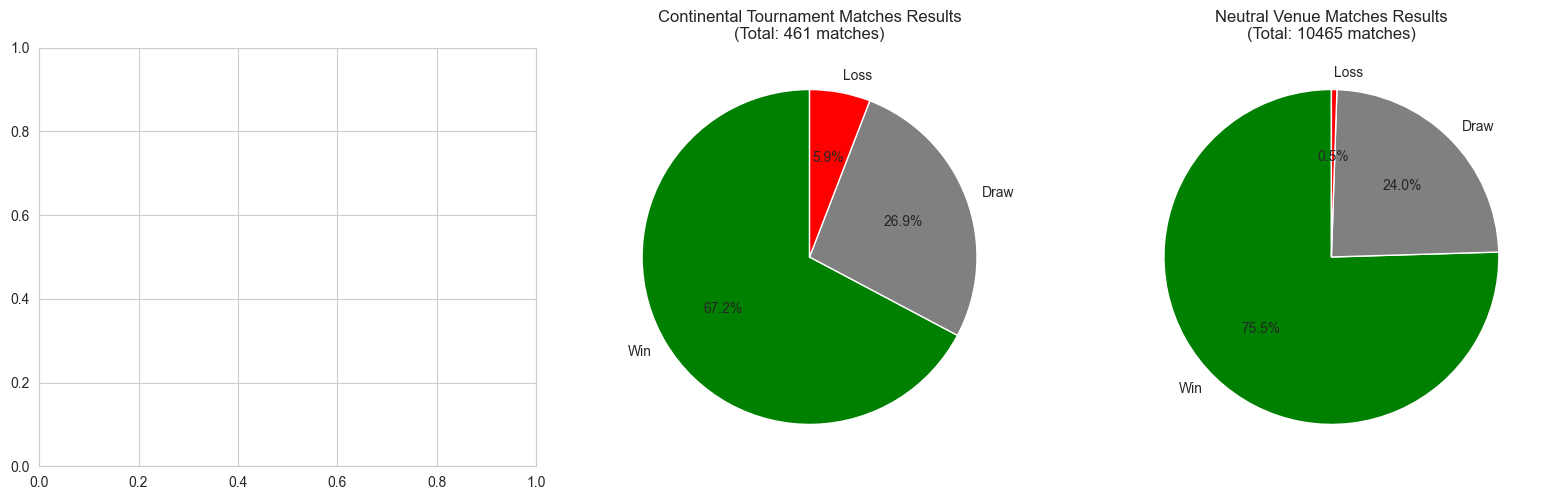


World Cup matches: 0
Continental tournament matches: 461
Neutral venue matches: 10465
Regular matches: 42903


In [53]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))


wc_matches = match_features[match_features['is_world_cup'] == 1]
if len(wc_matches) > 0:
    wc_results = wc_matches['home_result'].value_counts()
    axes[0].pie(wc_results.values, labels=wc_results.index, autopct='%1.1f%%', 
                colors=['green', 'gray', 'red'], startangle=90)
    axes[0].set_title(f'World Cup Matches Results\n(Total: {len(wc_matches)} matches)', fontsize=12)


continental_matches = match_features[match_features['is_continental'] == 1]
if len(continental_matches) > 0:
    cont_results = continental_matches['home_result'].value_counts()
    axes[1].pie(cont_results.values, labels=cont_results.index, autopct='%1.1f%%',
                colors=['green', 'gray', 'red'], startangle=90)
    axes[1].set_title(f'Continental Tournament Matches Results\n(Total: {len(continental_matches)} matches)', fontsize=12)


neutral_matches = match_features[match_features['is_neutral'] == 1]
if len(neutral_matches) > 0:
    neutral_results = neutral_matches['home_result'].value_counts()
    axes[2].pie(neutral_results.values, labels=neutral_results.index, autopct='%1.1f%%',
                colors=['green', 'gray', 'red'], startangle=90)
    axes[2].set_title(f'Neutral Venue Matches Results\n(Total: {len(neutral_matches)} matches)', fontsize=12)

plt.tight_layout()
plt.show()

print(f"\nWorld Cup matches: {len(wc_matches)}")
print(f"Continental tournament matches: {len(continental_matches)}")
print(f"Neutral venue matches: {len(neutral_matches)}")
print(f"Regular matches: {len(match_features) - len(wc_matches) - len(continental_matches)}")


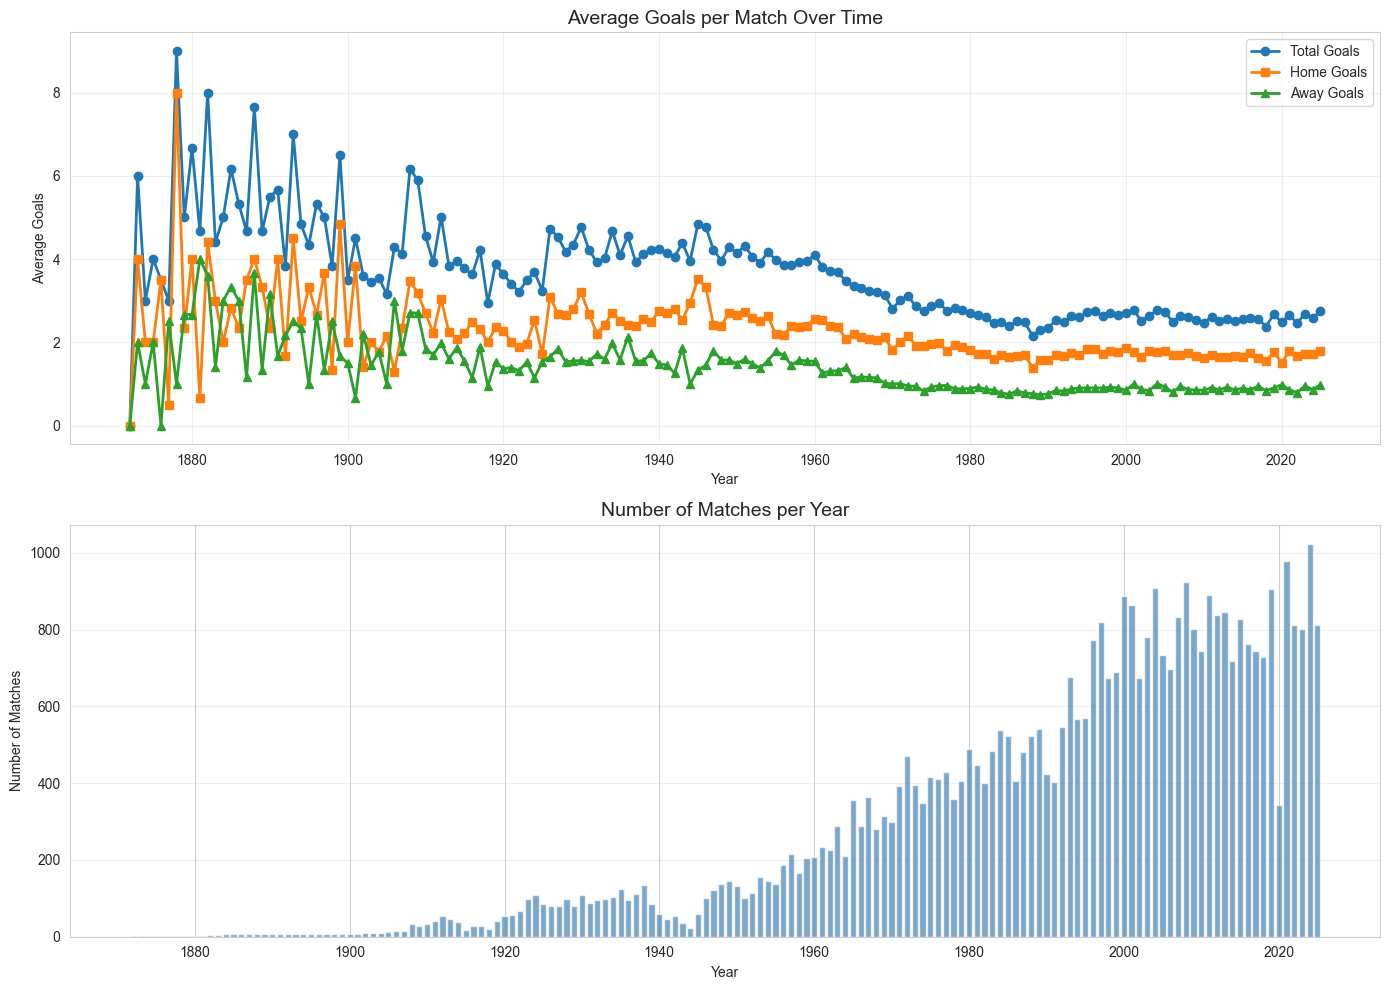

In [54]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))


goals_by_year = match_features.groupby('year').agg({
    'total_goals': 'mean',
    'home_goals': 'mean',
    'away_goals': 'mean'
}).reset_index()

axes[0].plot(goals_by_year['year'], goals_by_year['total_goals'], 
             marker='o', label='Total Goals', linewidth=2)
axes[0].plot(goals_by_year['year'], goals_by_year['home_goals'], 
             marker='s', label='Home Goals', linewidth=2)
axes[0].plot(goals_by_year['year'], goals_by_year['away_goals'], 
             marker='^', label='Away Goals', linewidth=2)
axes[0].set_title('Average Goals per Match Over Time', fontsize=14)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Goals')
axes[0].legend()
axes[0].grid(True, alpha=0.3)


matches_by_year = match_features.groupby('year').size().reset_index(name='num_matches')
axes[1].bar(matches_by_year['year'], matches_by_year['num_matches'], color='steelblue', alpha=0.7)
axes[1].set_title('Number of Matches per Year', fontsize=14)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Matches')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


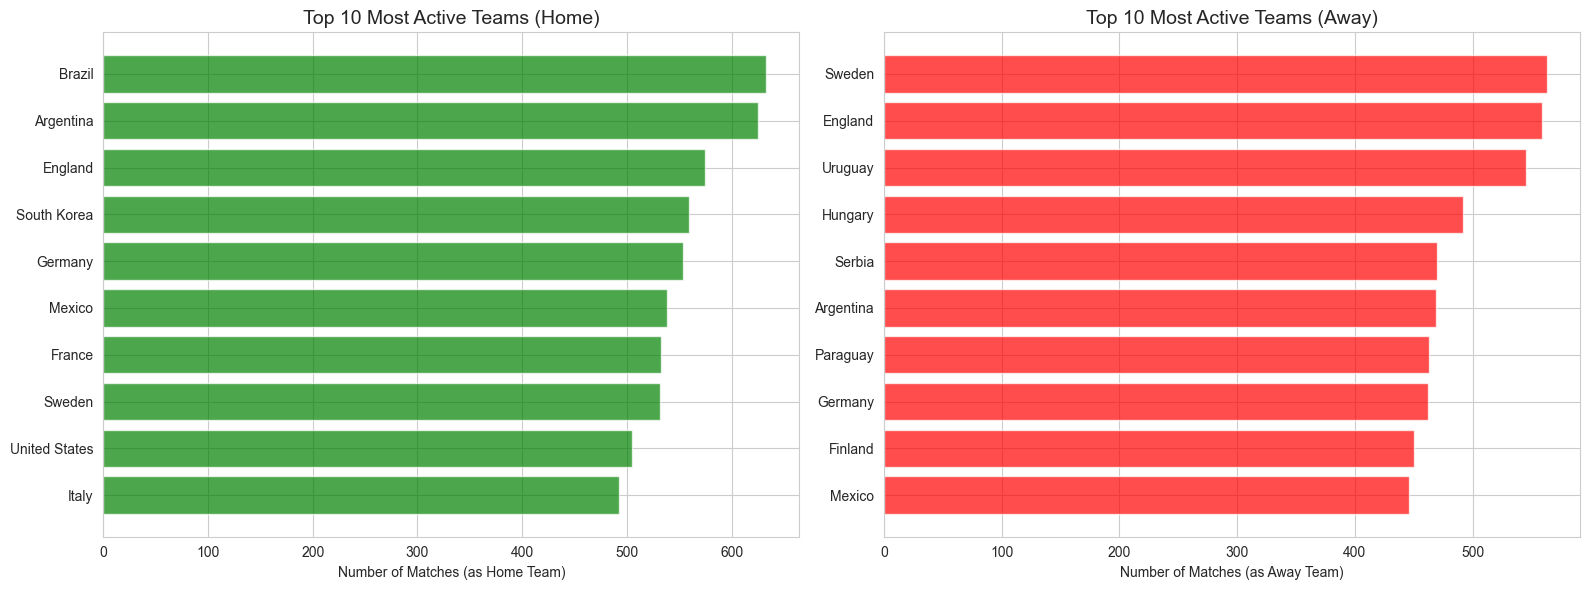

In [55]:
top_teams_home = match_features['_home_team'].value_counts().head(10)
top_teams_away = match_features['_away_team'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(range(len(top_teams_home)), top_teams_home.values, color='green', alpha=0.7)
axes[0].set_yticks(range(len(top_teams_home)))
axes[0].set_yticklabels(top_teams_home.index)
axes[0].set_xlabel('Number of Matches (as Home Team)')
axes[0].set_title('Top 10 Most Active Teams (Home)', fontsize=14)
axes[0].invert_yaxis()

axes[1].barh(range(len(top_teams_away)), top_teams_away.values, color='red', alpha=0.7)
axes[1].set_yticks(range(len(top_teams_away)))
axes[1].set_yticklabels(top_teams_away.index)
axes[1].set_xlabel('Number of Matches (as Away Team)')
axes[1].set_title('Top 10 Most Active Teams (Away)', fontsize=14)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


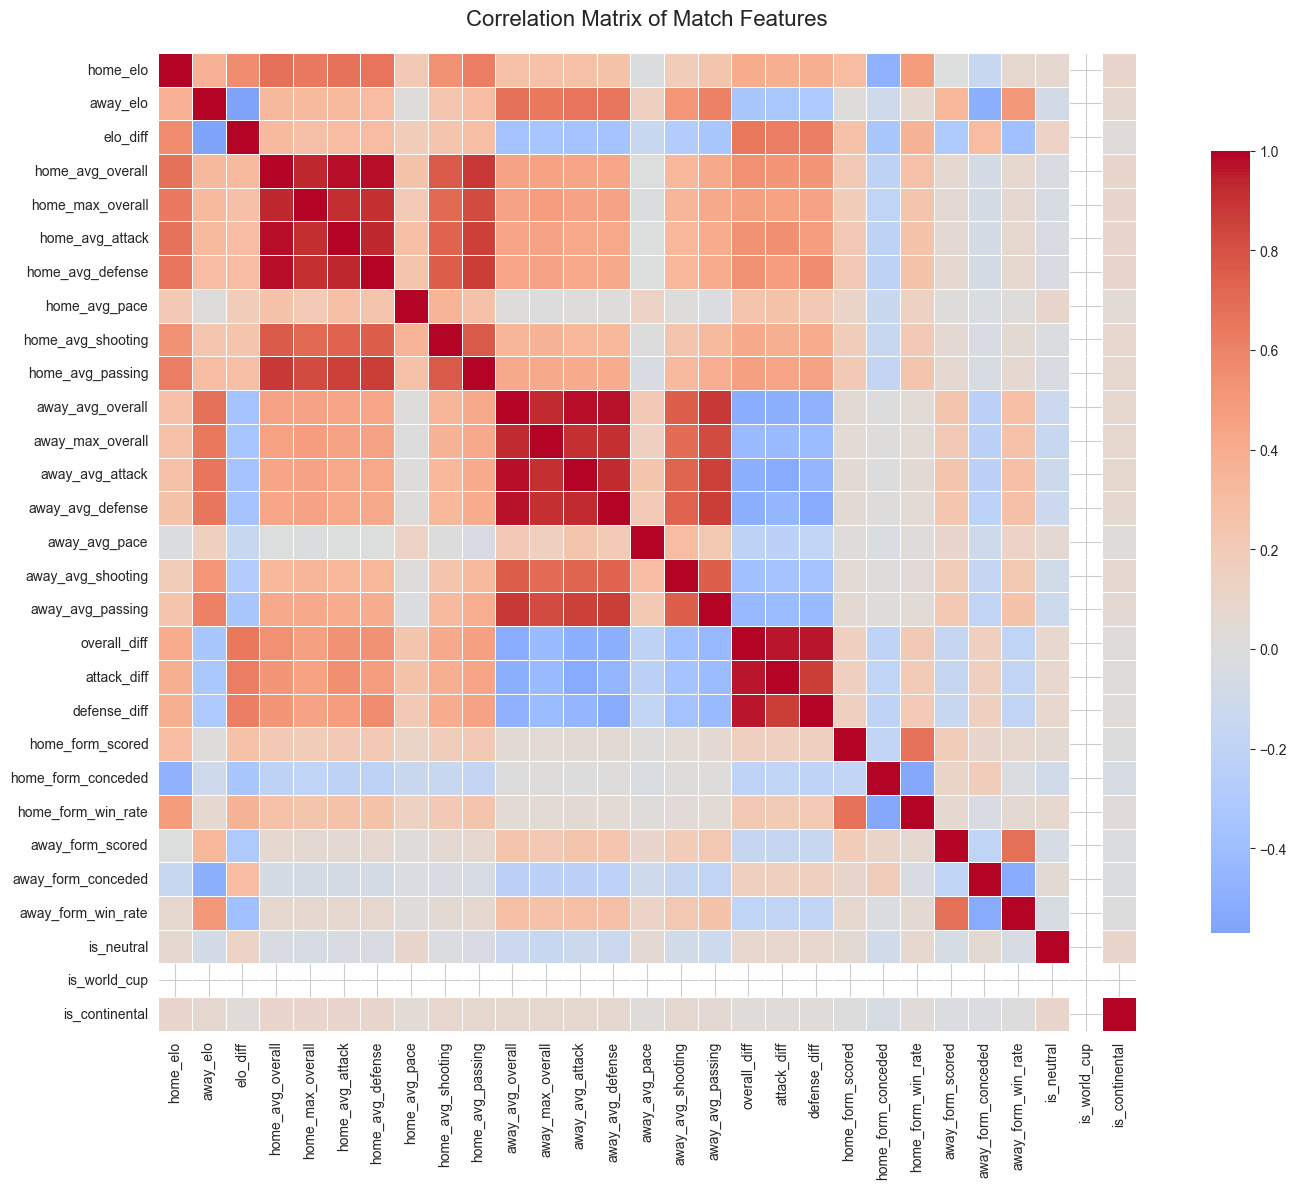


Top features correlated with Home Goals:
home_goals            1.000000
elo_diff              0.401788
away_form_conceded    0.327419
overall_diff          0.298673
attack_diff           0.290768
defense_diff          0.286055
home_form_scored      0.202208
home_elo              0.143396
home_form_win_rate    0.142107
home_avg_overall      0.127499
Name: home_goals, dtype: float64


In [56]:
numeric_cols = match_features.select_dtypes(include=[np.number]).columns.tolist()

corr_cols = [col for col in numeric_cols if col not in ['year', 'home_goals', 'away_goals', 'total_goals', 'goal_diff']]

correlation_matrix = match_features[corr_cols].corr()


plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Match Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

if 'home_goals' in match_features.columns:
    home_goals_corr = match_features[corr_cols + ['home_goals']].corr()['home_goals'].sort_values(ascending=False)
    print("\nTop features correlated with Home Goals:")
    print(home_goals_corr.head(10))


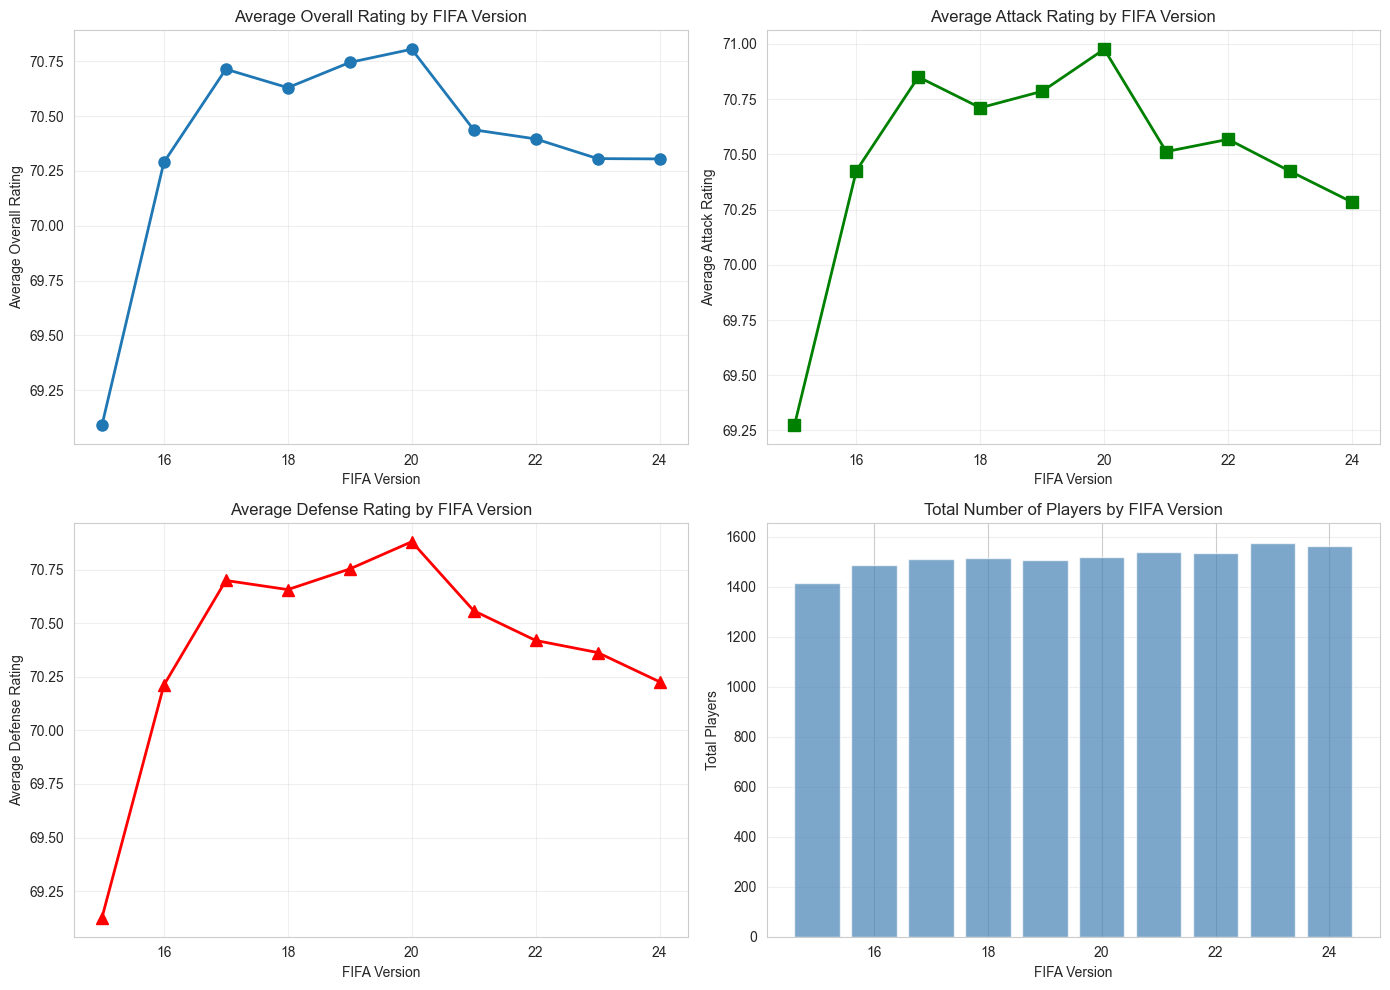

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))


avg_overall_by_version = player_agg.groupby('fifa_version')['avg_overall'].mean()
axes[0, 0].plot(avg_overall_by_version.index, avg_overall_by_version.values, 
                marker='o', linewidth=2, markersize=8)
axes[0, 0].set_title('Average Overall Rating by FIFA Version', fontsize=12)
axes[0, 0].set_xlabel('FIFA Version')
axes[0, 0].set_ylabel('Average Overall Rating')
axes[0, 0].grid(True, alpha=0.3)


avg_attack_by_version = player_agg.groupby('fifa_version')['avg_attack_overall'].mean()
axes[0, 1].plot(avg_attack_by_version.index, avg_attack_by_version.values, 
                marker='s', linewidth=2, markersize=8, color='green')
axes[0, 1].set_title('Average Attack Rating by FIFA Version', fontsize=12)
axes[0, 1].set_xlabel('FIFA Version')
axes[0, 1].set_ylabel('Average Attack Rating')
axes[0, 1].grid(True, alpha=0.3)


avg_defense_by_version = player_agg.groupby('fifa_version')['avg_defense_overall'].mean()
axes[1, 0].plot(avg_defense_by_version.index, avg_defense_by_version.values, 
                marker='^', linewidth=2, markersize=8, color='red')
axes[1, 0].set_title('Average Defense Rating by FIFA Version', fontsize=12)
axes[1, 0].set_xlabel('FIFA Version')
axes[1, 0].set_ylabel('Average Defense Rating')
axes[1, 0].grid(True, alpha=0.3)


num_players_by_version = player_agg.groupby('fifa_version')['num_players'].sum()
axes[1, 1].bar(num_players_by_version.index, num_players_by_version.values, color='steelblue', alpha=0.7)
axes[1, 1].set_title('Total Number of Players by FIFA Version', fontsize=12)
axes[1, 1].set_xlabel('FIFA Version')
axes[1, 1].set_ylabel('Total Players')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


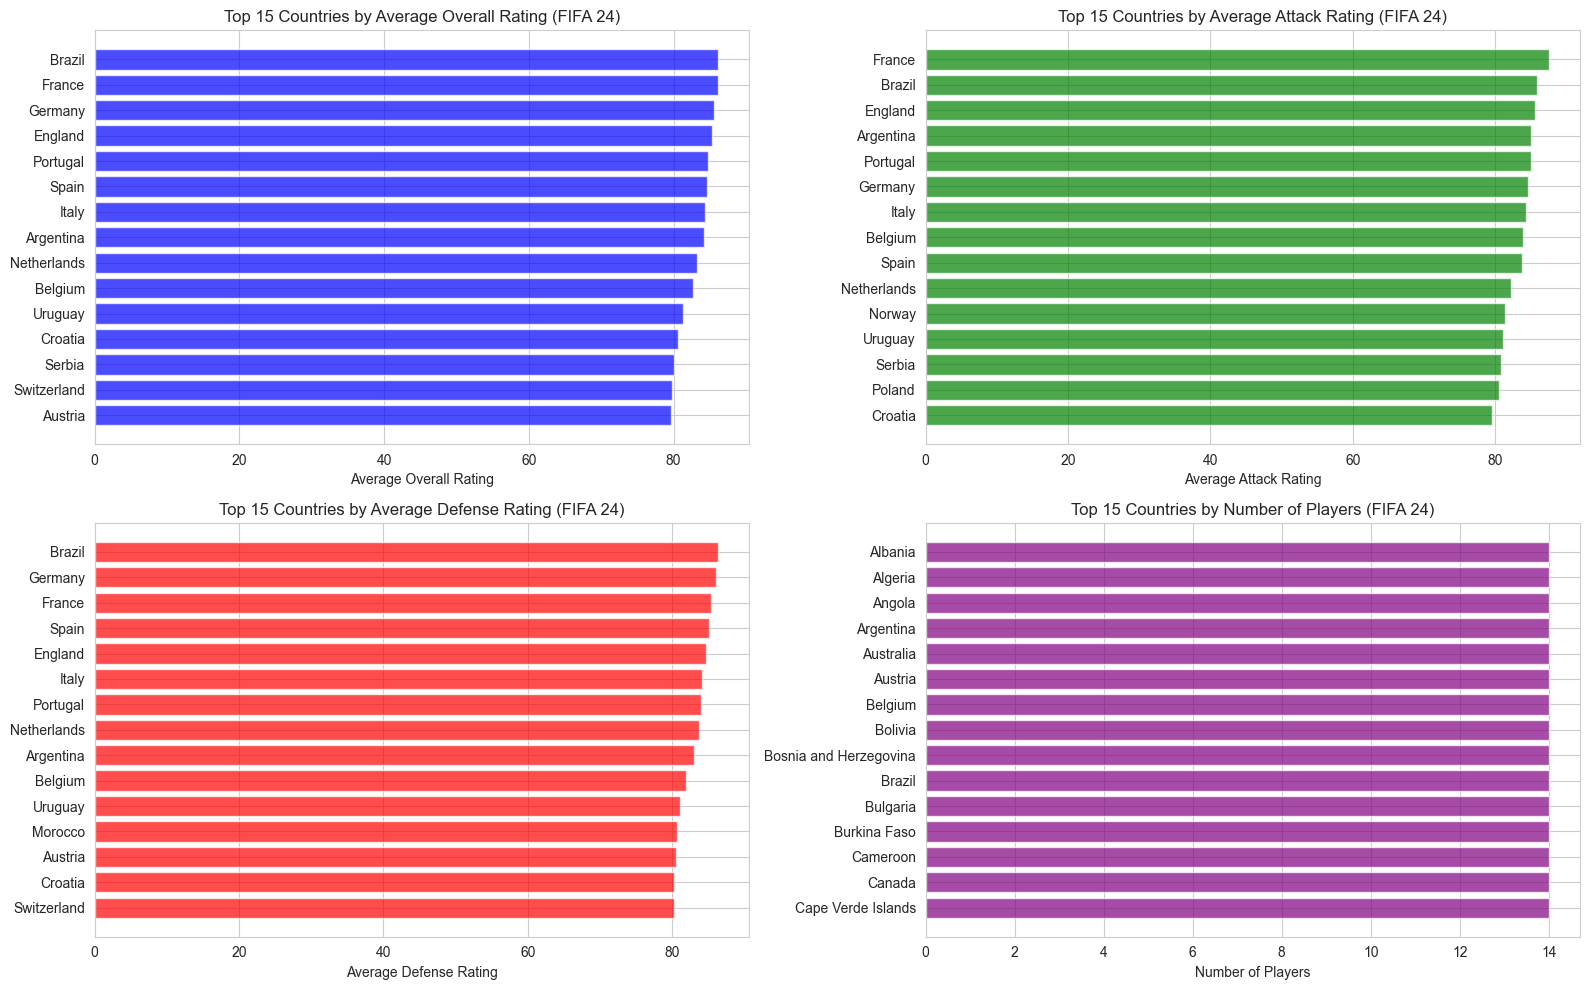

In [58]:
latest_version = player_agg['fifa_version'].max()
latest_data = player_agg[player_agg['fifa_version'] == latest_version]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))


top_overall = latest_data.nlargest(15, 'avg_overall')
axes[0, 0].barh(range(len(top_overall)), top_overall['avg_overall'], color='blue', alpha=0.7)
axes[0, 0].set_yticks(range(len(top_overall)))
axes[0, 0].set_yticklabels(top_overall['country'])
axes[0, 0].set_xlabel('Average Overall Rating')
axes[0, 0].set_title(f'Top 15 Countries by Average Overall Rating (FIFA {latest_version})', fontsize=12)
axes[0, 0].invert_yaxis()

top_attack = latest_data.nlargest(15, 'avg_attack_overall')
axes[0, 1].barh(range(len(top_attack)), top_attack['avg_attack_overall'], color='green', alpha=0.7)
axes[0, 1].set_yticks(range(len(top_attack)))
axes[0, 1].set_yticklabels(top_attack['country'])
axes[0, 1].set_xlabel('Average Attack Rating')
axes[0, 1].set_title(f'Top 15 Countries by Average Attack Rating (FIFA {latest_version})', fontsize=12)
axes[0, 1].invert_yaxis()


top_defense = latest_data.nlargest(15, 'avg_defense_overall')
axes[1, 0].barh(range(len(top_defense)), top_defense['avg_defense_overall'], color='red', alpha=0.7)
axes[1, 0].set_yticks(range(len(top_defense)))
axes[1, 0].set_yticklabels(top_defense['country'])
axes[1, 0].set_xlabel('Average Defense Rating')
axes[1, 0].set_title(f'Top 15 Countries by Average Defense Rating (FIFA {latest_version})', fontsize=12)
axes[1, 0].invert_yaxis()

top_players = latest_data.nlargest(15, 'num_players')
axes[1, 1].barh(range(len(top_players)), top_players['num_players'], color='purple', alpha=0.7)
axes[1, 1].set_yticks(range(len(top_players)))
axes[1, 1].set_yticklabels(top_players['country'])
axes[1, 1].set_xlabel('Number of Players')
axes[1, 1].set_title(f'Top 15 Countries by Number of Players (FIFA {latest_version})', fontsize=12)
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()


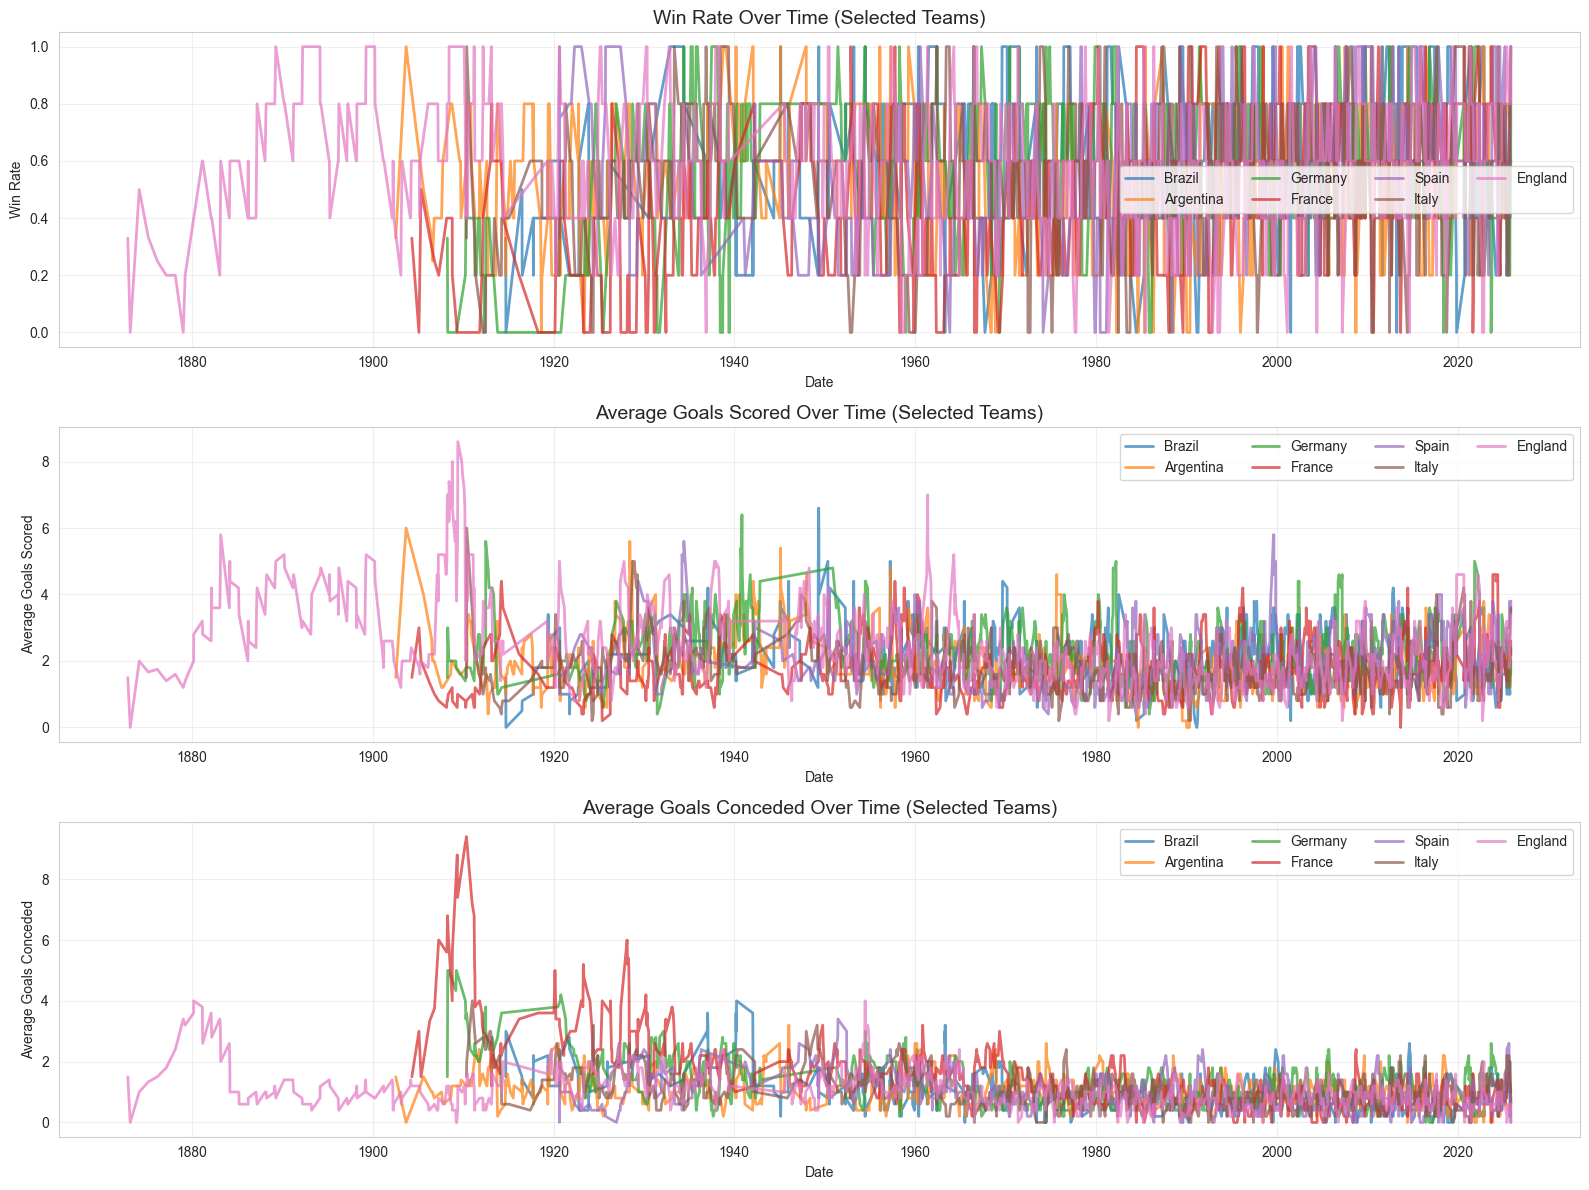

In [59]:
popular_teams = ['Brazil', 'Argentina', 'Germany', 'France', 'Spain', 'Italy', 'England']

fig, axes = plt.subplots(3, 1, figsize=(16, 12))

for team in popular_teams:
    team_data = teams_form[teams_form['team'] == team].sort_values('match_date')
    if len(team_data) > 0:
        axes[0].plot(team_data['match_date'], team_data['win_rate'], 
                    label=team, linewidth=2, alpha=0.7)
        axes[1].plot(team_data['match_date'], team_data['avg_goals_scored'], 
                    label=team, linewidth=2, alpha=0.7)
        axes[2].plot(team_data['match_date'], team_data['avg_goals_conceded'], 
                    label=team, linewidth=2, alpha=0.7)

axes[0].set_title('Win Rate Over Time (Selected Teams)', fontsize=14)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Win Rate')
axes[0].legend(loc='best', ncol=4)
axes[0].grid(True, alpha=0.3)

axes[1].set_title('Average Goals Scored Over Time (Selected Teams)', fontsize=14)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average Goals Scored')
axes[1].legend(loc='best', ncol=4)
axes[1].grid(True, alpha=0.3)

axes[2].set_title('Average Goals Conceded Over Time (Selected Teams)', fontsize=14)
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Average Goals Conceded')
axes[2].legend(loc='best', ncol=4)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

feature_cols = [
    'home_elo', 'away_elo', 'elo_diff',
    'home_avg_overall', 'away_avg_overall', 'overall_diff',
    'home_avg_attack', 'away_avg_attack', 'attack_diff',
    'home_avg_defense', 'away_avg_defense', 'defense_diff',
    'home_form_scored', 'home_form_conceded', 'home_form_win_rate',
    'away_form_scored', 'away_form_conceded', 'away_form_win_rate',
    'is_neutral', 'is_world_cup', 'is_continental'
]

match_features['target'] = match_features['home_result'].map({'Win': 1, 'Draw': 0, 'Loss': -1})


model_data = match_features[feature_cols + ['target']].dropna()

X = model_data[feature_cols]
y = model_data['target']

print(f"Dataset shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")


Dataset shape: (43364, 21)
Target distribution:
target
 1    24491
 0    10174
-1     8699
Name: count, dtype: int64


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Away Win', 'Draw', 'Home Win']))


Model Accuracy: 0.6265

Classification Report:
              precision    recall  f1-score   support

    Away Win       0.54      0.51      0.52      1740
        Draw       0.47      0.03      0.06      2035
    Home Win       0.65      0.92      0.76      4898

    accuracy                           0.63      8673
   macro avg       0.55      0.49      0.45      8673
weighted avg       0.59      0.63      0.55      8673



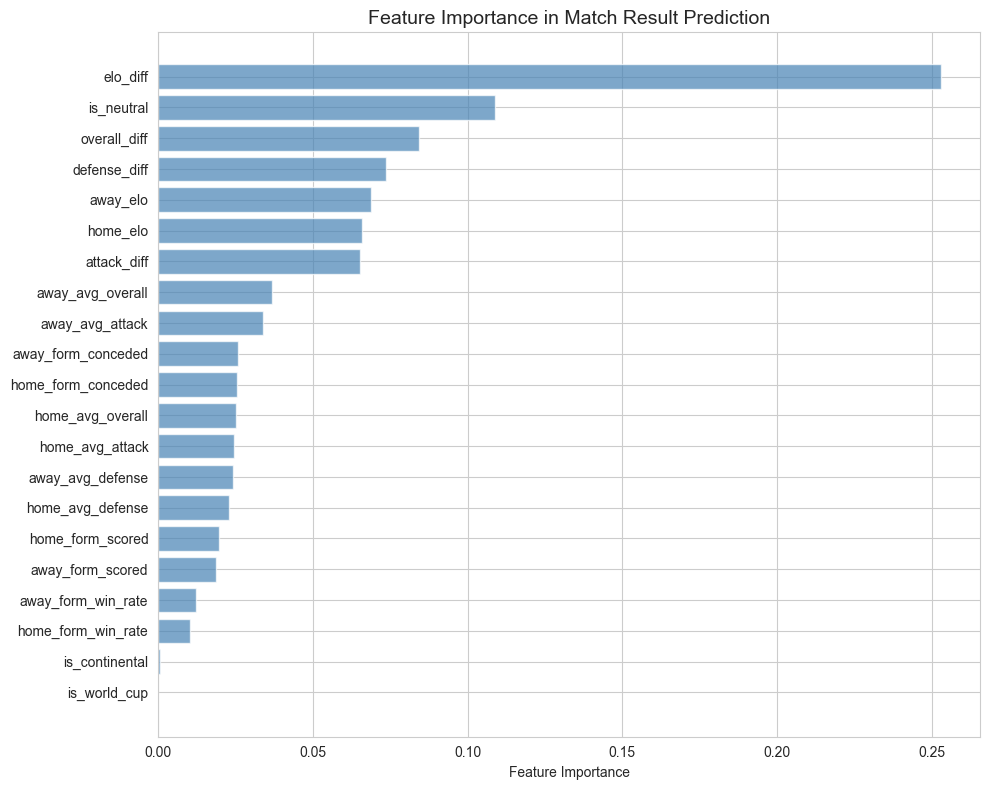


Top 10 Most Important Features:
               feature  importance
2             elo_diff    0.252974
18          is_neutral    0.108964
5         overall_diff    0.084163
11        defense_diff    0.073545
1             away_elo    0.068739
0             home_elo    0.065917
8          attack_diff    0.065370
4     away_avg_overall    0.036822
7      away_avg_attack    0.033970
16  away_form_conceded    0.025742


In [62]:
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance)), feature_importance['importance'], color='steelblue', alpha=0.7)
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Match Result Prediction', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


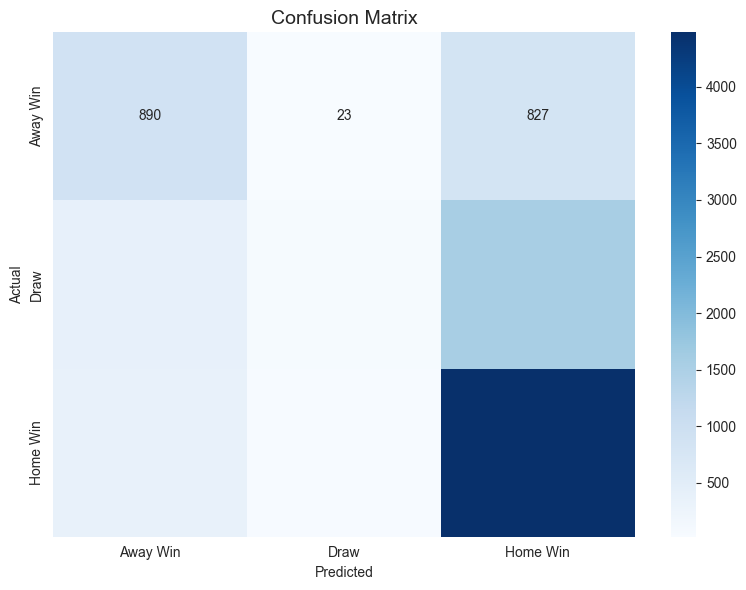

In [63]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Away Win', 'Draw', 'Home Win'],
            yticklabels=['Away Win', 'Draw', 'Home Win'])
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


In [64]:
print("Creating advanced features...")


match_features_enhanced = match_features.copy()


match_features_enhanced['home_strength'] = (
    match_features_enhanced['home_elo'] * 0.4 + 
    match_features_enhanced['home_avg_overall'] * 0.3 + 
    match_features_enhanced['home_form_win_rate'] * 100 * 0.3
)

match_features_enhanced['away_strength'] = (
    match_features_enhanced['away_elo'] * 0.4 + 
    match_features_enhanced['away_avg_overall'] * 0.3 + 
    match_features_enhanced['away_form_win_rate'] * 100 * 0.3
)

match_features_enhanced['strength_diff'] = match_features_enhanced['home_strength'] - match_features_enhanced['away_strength']


match_features_enhanced['home_attack_vs_away_defense'] = (
    match_features_enhanced['home_avg_attack'] - match_features_enhanced['away_avg_defense']
)
match_features_enhanced['away_attack_vs_home_defense'] = (
    match_features_enhanced['away_avg_attack'] - match_features_enhanced['home_avg_defense']
)

match_features_enhanced['home_form_momentum'] = (
    match_features_enhanced['home_form_scored'] - match_features_enhanced['home_form_conceded']
)
match_features_enhanced['away_form_momentum'] = (
    match_features_enhanced['away_form_scored'] - match_features_enhanced['away_form_conceded']
)
match_features_enhanced['form_momentum_diff'] = (
    match_features_enhanced['home_form_momentum'] - match_features_enhanced['away_form_momentum']
)


match_features_enhanced['elo_advantage'] = pd.cut(
    match_features_enhanced['elo_diff'],
    bins=[-np.inf, -100, -50, 0, 50, 100, np.inf],
    labels=['Strong Away', 'Moderate Away', 'Slight Away', 'Slight Home', 'Moderate Home', 'Strong Home']
)


match_features_enhanced['overall_advantage'] = pd.cut(
    match_features_enhanced['overall_diff'],
    bins=[-np.inf, -5, -2, 0, 2, 5, np.inf],
    labels=['Strong Away', 'Moderate Away', 'Slight Away', 'Slight Home', 'Moderate Home', 'Strong Home']
)


match_features_enhanced['tournament_importance'] = (
    match_features_enhanced['is_world_cup'] * 3 + 
    match_features_enhanced['is_continental'] * 2 + 
    (1 - match_features_enhanced['is_world_cup'] - match_features_enhanced['is_continental']) * 1
)

print("Advanced features created!")
print(f"New feature count: {len(match_features_enhanced.columns)}")


Creating advanced features...
Advanced features created!
New feature count: 51


In [65]:
from sklearn.preprocessing import LabelEncoder

enhanced_feature_cols = [
   
    'home_elo', 'away_elo', 'elo_diff',
    'home_avg_overall', 'away_avg_overall', 'overall_diff',
    'home_avg_attack', 'away_avg_attack', 'attack_diff',
    'home_avg_defense', 'away_avg_defense', 'defense_diff',
    'home_form_scored', 'home_form_conceded', 'home_form_win_rate',
    'away_form_scored', 'away_form_conceded', 'away_form_win_rate',
    'is_neutral', 'is_world_cup', 'is_continental',
    
    'home_strength', 'away_strength', 'strength_diff',
    'home_attack_vs_away_defense', 'away_attack_vs_home_defense',
    'home_form_momentum', 'away_form_momentum', 'form_momentum_diff',
    'tournament_importance'
]


le_elo = LabelEncoder()
le_overall = LabelEncoder()

match_features_enhanced['elo_advantage_encoded'] = le_elo.fit_transform(match_features_enhanced['elo_advantage'].astype(str))
match_features_enhanced['overall_advantage_encoded'] = le_overall.fit_transform(match_features_enhanced['overall_advantage'].astype(str))

enhanced_feature_cols.extend(['elo_advantage_encoded', 'overall_advantage_encoded'])

enhanced_model_data = match_features_enhanced[enhanced_feature_cols + ['target']].dropna()

X_enhanced = enhanced_model_data[enhanced_feature_cols]
y_enhanced = enhanced_model_data['target']

print(f"Enhanced dataset shape: {X_enhanced.shape}")
print(f"Target distribution:\n{y_enhanced.value_counts()}")
print(f"\nNumber of features: {len(enhanced_feature_cols)}")

Enhanced dataset shape: (43364, 32)
Target distribution:
target
 1    24491
 0    10174
-1     8699
Name: count, dtype: int64

Number of features: 32


In [66]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, random_state=42, stratify=y_enhanced
)

print("Before SMOTE:")
print(f"Training set distribution: {Counter(y_train_enh)}")


smote = SMOTE(random_state=42, k_neighbors=3)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_enh, y_train_enh)

print("\nAfter SMOTE:")
print(f"Training set distribution: {Counter(y_train_balanced)}")
print(f"Training set shape: {X_train_balanced.shape}")

Before SMOTE:
Training set distribution: Counter({1: 19593, 0: 8139, -1: 6959})

After SMOTE:
Training set distribution: Counter({0: 19593, 1: 19593, -1: 19593})
Training set shape: (58779, 32)


In [67]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler


hgb_model = HistGradientBoostingClassifier(
    max_iter=500,
    max_depth=10,
    learning_rate=0.05,
    min_samples_leaf=20,
    l2_regularization=0.1,
    max_bins=255,
    random_state=42,
    class_weight='balanced'
)

hgb_model.fit(X_train_balanced, y_train_balanced)

y_pred_hgb = hgb_model.predict(X_test_enh)
accuracy_hgb = accuracy_score(y_test_enh, y_pred_hgb)

print(f"\nHistGradientBoosting Accuracy: {accuracy_hgb:.4f} ({accuracy_hgb*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test_enh, y_pred_hgb, target_names=['Away Win', 'Draw', 'Home Win']))



HistGradientBoosting Accuracy: 0.6164 (61.64%)

Classification Report:
              precision    recall  f1-score   support

    Away Win       0.52      0.53      0.53      1740
        Draw       0.33      0.12      0.18      2035
    Home Win       0.68      0.85      0.76      4898

    accuracy                           0.62      8673
   macro avg       0.51      0.50      0.49      8673
weighted avg       0.56      0.62      0.57      8673



In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

print("Training Neural Network (MLPClassifier)...")
print("(Neural networks can capture complex non-linear patterns)")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test_enh)


mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # Three hidden layers
    activation='relu',
    solver='adam',
    alpha=0.001,  
    batch_size=256,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    random_state=42
)

print("Training (this may take a few minutes)...")
mlp_model.fit(X_train_scaled, y_train_balanced)

y_pred_mlp = mlp_model.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test_enh, y_pred_mlp)

print(f"\nNeural Network Accuracy: {accuracy_mlp:.4f} ({accuracy_mlp*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test_enh, y_pred_mlp, target_names=['Away Win', 'Draw', 'Home Win']))

Training Neural Network (MLPClassifier)...
(Neural networks can capture complex non-linear patterns)
Training (this may take a few minutes)...

Neural Network Accuracy: 0.5418 (54.18%)

Classification Report:
              precision    recall  f1-score   support

    Away Win       0.43      0.52      0.47      1740
        Draw       0.28      0.31      0.30      2035
    Home Win       0.73      0.65      0.68      4898

    accuracy                           0.54      8673
   macro avg       0.48      0.49      0.48      8673
weighted avg       0.56      0.54      0.55      8673



In [69]:
match_features_final = match_features_enhanced.copy()

match_features_final['days_since_epoch'] = (match_features_final['_date'] - pd.Timestamp('1970-01-01')).dt.days
match_features_final['month'] = match_features_final['_date'].dt.month
match_features_final['day_of_year'] = match_features_final['_date'].dt.dayofyear


match_features_final['elo_overall_interaction'] = (
    match_features_final['elo_diff'] * match_features_final['overall_diff']
)
match_features_final['form_elo_interaction'] = (
    match_features_final['home_form_win_rate'] * match_features_final['elo_diff']
)

match_features_final['home_elo_ratio'] = (
    match_features_final['home_elo'] / (match_features_final['away_elo'] + 1)
)
match_features_final['home_overall_ratio'] = (
    match_features_final['home_avg_overall'] / (match_features_final['away_avg_overall'] + 1)
)


match_features_final['home_form_ratio'] = (
    match_features_final['home_form_scored'] / (match_features_final['home_form_conceded'] + 0.1)
)
match_features_final['away_form_ratio'] = (
    match_features_final['away_form_scored'] / (match_features_final['away_form_conceded'] + 0.1)
)


match_features_final['home_total_strength'] = (
    match_features_final['home_elo'] * 0.5 + 
    match_features_final['home_avg_overall'] * 2 + 
    match_features_final['home_form_win_rate'] * 100
)
match_features_final['away_total_strength'] = (
    match_features_final['away_elo'] * 0.5 + 
    match_features_final['away_avg_overall'] * 2 + 
    match_features_final['away_form_win_rate'] * 100
)
match_features_final['total_strength_diff'] = (
    match_features_final['home_total_strength'] - match_features_final['away_total_strength']
)

print(f"Total features now: {len(match_features_final.columns)}")


Total features now: 65


In [70]:
final_feature_cols = [
    
    'home_elo', 'away_elo', 'elo_diff',
    'home_avg_overall', 'away_avg_overall', 'overall_diff',
    'home_avg_attack', 'away_avg_attack', 'attack_diff',
    'home_avg_defense', 'away_avg_defense', 'defense_diff',
    'home_form_scored', 'home_form_conceded', 'home_form_win_rate',
    'away_form_scored', 'away_form_conceded', 'away_form_win_rate',
    'is_neutral', 'is_world_cup', 'is_continental',
    
    'home_strength', 'away_strength', 'strength_diff',
    'home_attack_vs_away_defense', 'away_attack_vs_home_defense',
    'home_form_momentum', 'away_form_momentum', 'form_momentum_diff',
    'tournament_importance',
    
    'home_elo_ratio', 'home_overall_ratio',
    'home_form_ratio', 'away_form_ratio',
    'home_total_strength', 'away_total_strength', 'total_strength_diff',
    'elo_overall_interaction', 'form_elo_interaction',
    'month', 'day_of_year'
]

final_model_data = match_features_final[final_feature_cols + ['target']].dropna()

X_final = final_model_data[final_feature_cols]
y_final = final_model_data['target']

print(f"Final dataset shape: {X_final.shape}")
print(f"Target distribution:\n{y_final.value_counts()}")
print(f"\nNumber of features: {len(final_feature_cols)}")


X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)

from imblearn.over_sampling import SMOTE
smote_final = SMOTE(random_state=42, k_neighbors=3)
X_train_final_balanced, y_train_final_balanced = smote_final.fit_resample(X_train_final, y_train_final)

print(f"\nAfter SMOTE - Training set shape: {X_train_final_balanced.shape}")
print(f"Training set distribution: {pd.Series(y_train_final_balanced).value_counts()}")


Final dataset shape: (43364, 41)
Target distribution:
target
 1    24491
 0    10174
-1     8699
Name: count, dtype: int64

Number of features: 41

After SMOTE - Training set shape: (58779, 41)
Training set distribution: target
 0    19593
 1    19593
-1    19593
Name: count, dtype: int64


In [71]:
print("=" * 60)
print("PROJECT SUMMARY")
print("=" * 60)

print(f"\n1. Dataset Overview:")
print(f"   - Total matches analyzed: {len(match_features):,}")
print(f"   - Date range: {match_features['_date'].min()} to {match_features['_date'].max()}")
print(f"   - Unique teams: {len(set(match_features['_home_team'].unique()) | set(match_features['_away_team'].unique()))}")

print(f"\n2. Match Results:")
result_summary = match_features['home_result'].value_counts()
for result, count in result_summary.items():
    print(f"   - {result}: {count:,} ({count/len(match_features)*100:.2f}%)")

print(f"\n3. Goals Statistics:")
print(f"   - Average total goals per match: {match_features['total_goals'].mean():.2f}")
print(f"   - Average home goals: {match_features['home_goals'].mean():.2f}")
print(f"   - Average away goals: {match_features['away_goals'].mean():.2f}")

print(f"\n4. Player Statistics:")
print(f"   - Countries in player aggregates: {player_agg['country'].nunique()}")
print(f"   - FIFA versions covered: {sorted(player_agg['fifa_version'].unique())}")
print(f"   - Average overall rating (latest): {player_agg[player_agg['fifa_version']==player_agg['fifa_version'].max()]['avg_overall'].mean():.2f}")

print(f"\n5. Model Performance:")
if 'accuracy' in locals():
    print(f"   - Prediction accuracy: {accuracy:.2%}")
    print(f"   - Top 3 predictive features:")
    for idx, row in feature_importance.head(3).iterrows():
        print(f"     {idx+1}. {row['feature']}: {row['importance']:.4f}")

print("\n" + "=" * 60)
print("Analysis Complete!")
print("=" * 60)


PROJECT SUMMARY

1. Dataset Overview:
   - Total matches analyzed: 43,364
   - Date range: 1872-11-30 00:00:00 to 2025-12-11 00:00:00
   - Unique teams: 180

2. Match Results:
   - Win: 24,491 (56.48%)
   - Draw: 10,174 (23.46%)
   - Loss: 8,699 (20.06%)

3. Goals Statistics:
   - Average total goals per match: 2.84
   - Average home goals: 1.85
   - Average away goals: 0.99

4. Player Statistics:
   - Countries in player aggregates: 188
   - FIFA versions covered: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
   - Average overall rating (latest): 70.30

5. Model Performance:
   - Prediction accuracy: 62.65%
   - Top 3 predictive features:
     3. elo_diff: 0.2530
     19. is_neutral: 0.1090
     6. overall_diff: 0.0842

Analysis Complete!


In [72]:
# Model 2: K-Nearest Neighbors (KNN)
print("=" * 60)
print("MODEL 2: K-Nearest Neighbors (KNN)")
print("=" * 60)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# KNN requires scaled features
scaler_knn = StandardScaler()
X_train_knn = scaler_knn.fit_transform(X_train_final_balanced)
X_test_knn = scaler_knn.transform(X_test_final)

# Try different k values
best_k = 5
best_knn_acc = 0

print("Finding optimal k value...")
for k in [3, 5, 7, 9, 11, 15]:
    knn_temp = KNeighborsClassifier(n_neighbors=k, weights='distance', n_jobs=-1)
    knn_temp.fit(X_train_knn, y_train_final_balanced)
    acc_temp = accuracy_score(y_test_final, knn_temp.predict(X_test_knn))
    if acc_temp > best_knn_acc:
        best_knn_acc = acc_temp
        best_k = k
    print(f"  k={k}: {acc_temp:.4f}")

# Train with best k
knn_model = KNeighborsClassifier(n_neighbors=best_k, weights='distance', n_jobs=-1)
knn_model.fit(X_train_knn, y_train_final_balanced)

y_pred_knn = knn_model.predict(X_test_knn)
accuracy_knn = accuracy_score(y_test_final, y_pred_knn)

print(f"\nKNN (k={best_k}) Accuracy: {accuracy_knn:.4f} ({accuracy_knn*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test_final, y_pred_knn, target_names=['Away Win', 'Draw', 'Home Win']))


MODEL 2: K-Nearest Neighbors (KNN)
Finding optimal k value...
  k=3: 0.4811
  k=5: 0.4860
  k=7: 0.4919
  k=9: 0.4963
  k=11: 0.4929
  k=15: 0.4986

KNN (k=15) Accuracy: 0.4986 (49.86%)

Classification Report:
              precision    recall  f1-score   support

    Away Win       0.39      0.56      0.46      1740
        Draw       0.28      0.38      0.32      2035
    Home Win       0.76      0.53      0.62      4898

    accuracy                           0.50      8673
   macro avg       0.48      0.49      0.47      8673
weighted avg       0.57      0.50      0.52      8673



In [ ]:
print("=" * 60)
print("DATA PREPARATION CHECK")
print("=" * 60)


if 'X_train_final_balanced' not in locals() and 'X_train_final_balanced' not in globals():
    print("\n⚠️  Data not prepared yet. Preparing data now...")
    print("(This may take a moment if feature engineering cells haven't been run)\n")
    
    if 'match_features_final' not in locals() and 'match_features_final' not in globals():
        print("Creating enhanced features...")
        # Recreate match_features_final from match_features_enhanced if it exists
        if 'match_features_enhanced' in locals() or 'match_features_enhanced' in globals():
            match_features_final = match_features_enhanced.copy()
            
            match_features_final['days_since_epoch'] = (match_features_final['_date'] - pd.Timestamp('1970-01-01')).dt.days
            match_features_final['month'] = match_features_final['_date'].dt.month
            match_features_final['day_of_year'] = match_features_final['_date'].dt.dayofyear
            match_features_final['elo_overall_interaction'] = match_features_final['elo_diff'] * match_features_final['overall_diff']
            match_features_final['form_elo_interaction'] = match_features_final['home_form_win_rate'] * match_features_final['elo_diff']
            match_features_final['home_elo_ratio'] = match_features_final['home_elo'] / (match_features_final['away_elo'] + 1)
            match_features_final['home_overall_ratio'] = match_features_final['home_avg_overall'] / (match_features_final['away_avg_overall'] + 1)
            match_features_final['home_form_ratio'] = match_features_final['home_form_scored'] / (match_features_final['home_form_conceded'] + 0.1)
            match_features_final['away_form_ratio'] = match_features_final['away_form_scored'] / (match_features_final['away_form_conceded'] + 0.1)
            match_features_final['home_total_strength'] = match_features_final['home_elo'] * 0.5 + match_features_final['home_avg_overall'] * 2 + match_features_final['home_form_win_rate'] * 100
            match_features_final['away_total_strength'] = match_features_final['away_elo'] * 0.5 + match_features_final['away_avg_overall'] * 2 + match_features_final['away_form_win_rate'] * 100
            match_features_final['total_strength_diff'] = match_features_final['home_total_strength'] - match_features_final['away_total_strength']
        else:
            print("ERROR: match_features_enhanced not found. Please run cells 28-29 first to create enhanced features.")
            raise NameError("Please run cells 28-29 first to prepare the data!")
    
    
    final_feature_cols = [
        'home_elo', 'away_elo', 'elo_diff',
        'home_avg_overall', 'away_avg_overall', 'overall_diff',
        'home_avg_attack', 'away_avg_attack', 'attack_diff',
        'home_avg_defense', 'away_avg_defense', 'defense_diff',
        'home_form_scored', 'home_form_conceded', 'home_form_win_rate',
        'away_form_scored', 'away_form_conceded', 'away_form_win_rate',
        'is_neutral', 'is_world_cup', 'is_continental',
        'home_strength', 'away_strength', 'strength_diff',
        'home_attack_vs_away_defense', 'away_attack_vs_home_defense',
        'home_form_momentum', 'away_form_momentum', 'form_momentum_diff',
        'tournament_importance',
        'home_elo_ratio', 'home_overall_ratio',
        'home_form_ratio', 'away_form_ratio',
        'home_total_strength', 'away_total_strength', 'total_strength_diff',
        'elo_overall_interaction', 'form_elo_interaction',
        'month', 'day_of_year'
    ]
    
    # Prepare data
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE
    
    final_model_data = match_features_final[final_feature_cols + ['target']].dropna()
    X_final = final_model_data[final_feature_cols]
    y_final = final_model_data['target']
    
    X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
        X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
    )
    
    smote_final = SMOTE(random_state=42, k_neighbors=3)
    X_train_final_balanced, y_train_final_balanced = smote_final.fit_resample(X_train_final, y_train_final)
    
    print("✅ Data prepared successfully!")
    print(f"   Training set shape: {X_train_final_balanced.shape}")
    print(f"   Test set shape: {X_test_final.shape}")
else:
    print("✅ Data already prepared!")
    print(f"   Training set shape: {X_train_final_balanced.shape}")
    print(f"   Test set shape: {X_test_final.shape}")

print("\n" + "=" * 60)
print("Ready to run new models! 🚀")
print("=" * 60)


DATA PREPARATION CHECK
✅ Data already prepared!
   Training set shape: (58779, 41)
   Test set shape: (8673, 41)

Ready to run new models! 🚀


In [ ]:
# Model 3: Extra Trees Classifier
print("=" * 60)
print("MODEL 3: Extra Trees Classifier")
print("=" * 60)

from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

et_model.fit(X_train_final_balanced, y_train_final_balanced)

y_pred_et = et_model.predict(X_test_final)
accuracy_et = accuracy_score(y_test_final, y_pred_et)

print(f"\nExtra Trees Accuracy: {accuracy_et:.4f} ({accuracy_et*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test_final, y_pred_et, target_names=['Away Win', 'Draw', 'Home Win']))


MODEL 3: Extra Trees Classifier

Extra Trees Accuracy: 0.5786 (57.86%)

Classification Report:
              precision    recall  f1-score   support

    Away Win       0.47      0.67      0.55      1740
        Draw       0.31      0.28      0.29      2035
    Home Win       0.76      0.67      0.71      4898

    accuracy                           0.58      8673
   macro avg       0.51      0.54      0.52      8673
weighted avg       0.59      0.58      0.58      8673



In [76]:
# Model 5: Ridge Classifier
print("=" * 60)
print("MODEL 5: Ridge Classifier")
print("=" * 60)

from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler

scaler_ridge = StandardScaler()
X_train_ridge = scaler_ridge.fit_transform(X_train_final_balanced)
X_test_ridge = scaler_ridge.transform(X_test_final)

ridge_model = RidgeClassifier(
    alpha=1.0,
    class_weight='balanced',
    random_state=42
)

ridge_model.fit(X_train_ridge, y_train_final_balanced)

y_pred_ridge = ridge_model.predict(X_test_ridge)
accuracy_ridge = accuracy_score(y_test_final, y_pred_ridge)

print(f"\nRidge Classifier Accuracy: {accuracy_ridge:.4f} ({accuracy_ridge*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test_final, y_pred_ridge, target_names=['Away Win', 'Draw', 'Home Win']))


MODEL 5: Ridge Classifier

Ridge Classifier Accuracy: 0.5783 (57.83%)

Classification Report:
              precision    recall  f1-score   support

    Away Win       0.46      0.67      0.55      1740
        Draw       0.30      0.23      0.26      2035
    Home Win       0.73      0.69      0.71      4898

    accuracy                           0.58      8673
   macro avg       0.50      0.53      0.51      8673
weighted avg       0.58      0.58      0.57      8673



In [77]:
# Model 6: Quadratic Discriminant Analysis & Gaussian Naive Bayes
print("=" * 60)
print("MODEL 6: Quadratic Discriminant Analysis (QDA)")
print("=" * 60)

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

scaler_qda = StandardScaler()
X_train_qda = scaler_qda.fit_transform(X_train_final_balanced)
X_test_qda = scaler_qda.transform(X_test_final)

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_qda, y_train_final_balanced)

y_pred_qda = qda_model.predict(X_test_qda)
accuracy_qda = accuracy_score(y_test_final, y_pred_qda)

print(f"\nQDA Accuracy: {accuracy_qda:.4f} ({accuracy_qda*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test_final, y_pred_qda, target_names=['Away Win', 'Draw', 'Home Win']))

print("\n" + "=" * 60)
print("MODEL 7: Gaussian Naive Bayes")
print("=" * 60)

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_qda, y_train_final_balanced)

y_pred_nb = nb_model.predict(X_test_qda)
accuracy_nb = accuracy_score(y_test_final, y_pred_nb)

print(f"\nGaussian Naive Bayes Accuracy: {accuracy_nb:.4f} ({accuracy_nb*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test_final, y_pred_nb, target_names=['Away Win', 'Draw', 'Home Win']))


MODEL 6: Quadratic Discriminant Analysis (QDA)

QDA Accuracy: 0.4497 (44.97%)

Classification Report:
              precision    recall  f1-score   support

    Away Win       0.40      0.42      0.41      1740
        Draw       0.27      0.53      0.35      2035
    Home Win       0.75      0.43      0.54      4898

    accuracy                           0.45      8673
   macro avg       0.47      0.46      0.44      8673
weighted avg       0.57      0.45      0.47      8673


MODEL 7: Gaussian Naive Bayes

Gaussian Naive Bayes Accuracy: 0.5262 (52.62%)

Classification Report:
              precision    recall  f1-score   support

    Away Win       0.44      0.72      0.55      1740
        Draw       0.30      0.38      0.34      2035
    Home Win       0.78      0.52      0.62      4898

    accuracy                           0.53      8673
   macro avg       0.51      0.54      0.50      8673
weighted avg       0.60      0.53      0.54      8673



In [79]:
print("=" * 60)
print("DEEP LEARNING MODELS")
print("=" * 60)
print("\nImplementing advanced deep learning architectures:")
print("1. Deep Neural Network (DNN) with multiple layers")
print("2. LSTM for time-series patterns")
print("3. Advanced DNN with attention mechanisms")
print("4. Ensemble of deep learning models\n")


import subprocess
import sys
subprocess.check_call([sys.executable, "-m", "pip", "install", "tensorflow", "-q"])
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
print(f"✅ TensorFlow {tf.__version__} installed successfully!")

tf.random.set_seed(42)
np.random.seed(42)


DEEP LEARNING MODELS

Implementing advanced deep learning architectures:
1. Deep Neural Network (DNN) with multiple layers
2. LSTM for time-series patterns
3. Advanced DNN with attention mechanisms
4. Ensemble of deep learning models



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-proto 1.36.0 requires protobuf<7.0,>=5.0, but you have protobuf 4.25.8 which is incompatible.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
2025-12-17 10:20:24.743697: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


✅ TensorFlow 2.16.2 installed successfully!


In [ ]:
print("=" * 60)
print("PREPARING DATA FOR DEEP LEARNING")
print("=" * 60)

if 'X_train_final_balanced' not in locals() and 'X_train_final_balanced' not in globals():
    print("⚠️  Data not prepared. Please run data preparation cell first!")
    raise NameError("Please run data preparation cell first!")
else:
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    
   
    scaler_dl = StandardScaler()
    X_train_dl = scaler_dl.fit_transform(X_train_final_balanced)
    X_test_dl = scaler_dl.transform(X_test_final)
    
   
    le_dl = LabelEncoder()
    y_train_dl = le_dl.fit_transform(y_train_final_balanced)
    y_test_dl = le_dl.transform(y_test_final)
    
   
    from tensorflow.keras.utils import to_categorical
    y_train_categorical = to_categorical(y_train_dl, num_classes=3)
    y_test_categorical = to_categorical(y_test_dl, num_classes=3)
    
    print(f"✅ Data prepared!")
    print(f"   Training shape: {X_train_dl.shape}")
    print(f"   Test shape: {X_test_dl.shape}")
    print(f"   Number of features: {X_train_dl.shape[1]}")
    print(f"   Number of classes: 3")
    
    from sklearn.model_selection import train_test_split
    X_train_dl, X_val_dl, y_train_categorical, y_val_categorical = train_test_split(
        X_train_dl, y_train_categorical, test_size=0.1, random_state=42
    )
    
    print(f"   Validation set: {X_val_dl.shape[0]} samples")


PREPARING DATA FOR DEEP LEARNING
✅ Data prepared!
   Training shape: (58779, 41)
   Test shape: (8673, 41)
   Number of features: 41
   Number of classes: 3
   Validation set: 5878 samples


DEEP LEARNING MODEL 1: Advanced Deep Neural Network

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        21,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,003 (781.26 KB)

 Trainable params: 198,083 (773.76 KB)

 Non-trainable params: 1,920 (7.50 KB)


🚀 Training Deep Neural Network (this may take several minutes)...
Epoch 1/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.4724 - loss: 1.0998 - val_accuracy: 0.5279 - val_loss: 0.9141 - learning_rate: 0.0010
Epoch 2/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5337 - loss: 0.9226 - val_accuracy: 0.5407 - val_loss: 0.8906 - learning_rate: 0.0010
Epoch 3/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5389 - loss: 0.9071 - val_accuracy: 0.5521 - val_loss: 0.8802 - learning_rate: 0.0010
Epoch 4/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5469 - loss: 0.9008 - val_accuracy: 0.5623 - val_loss: 0.8781 - learning_rate: 0.0010
Epoch 5/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5486 - loss: 0.8955 - val_accuracy: 0.5618 - val_loss: 0.8741 - learning_rate: 0.0010
Epoch 6/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5557 - loss: 0.8890 - val_accuracy: 0.5686 - val_loss: 0.8766 - learning_rate: 0.0010
Epoch 7/2

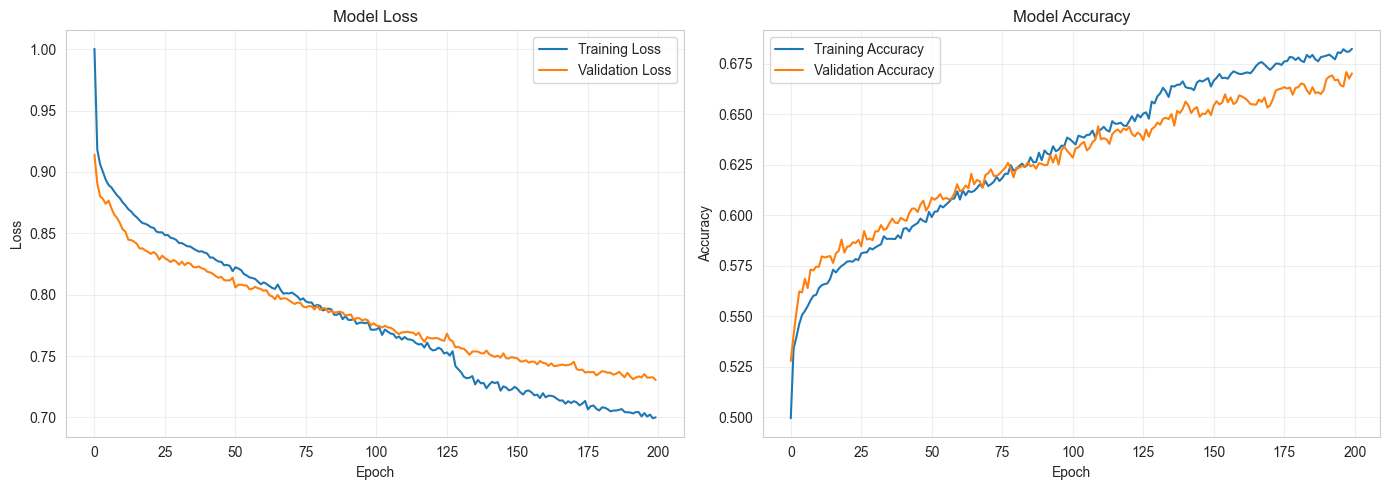

In [81]:
print("=" * 60)
print("DEEP LEARNING MODEL 1: Advanced Deep Neural Network")
print("=" * 60)

def create_dnn_model(input_dim, dropout_rate=0.3):
    """Create a deep neural network with multiple layers"""
    model = keras.Sequential([
    
        layers.Dense(512, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        
       
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate * 0.7),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate * 0.5),
        
        layers.Dense(32, activation='relu'),
        layers.Dropout(dropout_rate * 0.3),
        
       
        layers.Dense(3, activation='softmax')
    ])
    
    return model

dnn_model = create_dnn_model(X_train_dl.shape[1], dropout_rate=0.4)

dnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel Architecture:")
dnn_model.summary()


early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1
)

history_dnn = dnn_model.fit(
    X_train_dl, y_train_categorical,
    validation_data=(X_val_dl, y_val_categorical),
    epochs=200,
    batch_size=256,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

y_pred_proba_dnn = dnn_model.predict(X_test_dl, verbose=0)
y_pred_dnn = np.argmax(y_pred_proba_dnn, axis=1)
y_pred_dnn_labels = le_dl.inverse_transform(y_pred_dnn)

accuracy_dnn = accuracy_score(y_test_final, y_pred_dnn_labels)

print(f"\n✅ Deep Neural Network Accuracy: {accuracy_dnn:.4f} ({accuracy_dnn*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test_final, y_pred_dnn_labels, target_names=['Away Win', 'Draw', 'Home Win']))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(history_dnn.history['loss'], label='Training Loss')
axes[0].plot(history_dnn.history['val_loss'], label='Validation Loss')
axes[0].set_title('Model Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history_dnn.history['accuracy'], label='Training Accuracy')
axes[1].plot(history_dnn.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [82]:
print("=" * 60)
print("MODEL 2: LSTM")
print("=" * 60)


sequence_length = 1
n_features = X_train_dl.shape[1]

X_train_lstm = X_train_dl.reshape((X_train_dl.shape[0], sequence_length, n_features))
X_val_lstm = X_val_dl.reshape((X_val_dl.shape[0], sequence_length, n_features))
X_test_lstm = X_test_dl.reshape((X_test_dl.shape[0], sequence_length, n_features))


lstm_model = keras.Sequential([
    layers.LSTM(128, return_sequences=True, input_shape=(sequence_length, n_features)),
    layers.Dropout(0.3),
    layers.LSTM(64, return_sequences=False),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax')
])

lstm_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("LSTM Model Architecture:")
lstm_model.summary()


history_lstm = lstm_model.fit(
    X_train_lstm, y_train_categorical,
    validation_data=(X_val_lstm, y_val_categorical),
    epochs=150,
    batch_size=256,
    callbacks=[
        callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
        callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)
    ],
    verbose=1
)


y_pred_proba_lstm = lstm_model.predict(X_test_lstm, verbose=0)
y_pred_lstm = np.argmax(y_pred_proba_lstm, axis=1)
y_pred_lstm_labels = le_dl.inverse_transform(y_pred_lstm)

accuracy_lstm = accuracy_score(y_test_final, y_pred_lstm_labels)

print(f"\n✅ LSTM Accuracy: {accuracy_lstm:.4f} ({accuracy_lstm*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test_final, y_pred_lstm_labels, target_names=['Away Win', 'Draw', 'Home Win']))


MODEL 2: LSTM
LSTM Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │        87,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,627 (541.51 KB)

 Trainable params: 138,627 (541.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5050 - loss: 0.9840 - val_accuracy: 0.5534 - val_loss: 0.8822 - learning_rate: 0.0010
Epoch 2/150
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5479 - loss: 0.9001 - val_accuracy: 0.5539 - val_loss: 0.8775 - learning_rate: 0.0010
Epoch 3/150
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5487 - loss: 0.8937 - val_accuracy: 0.5541 - val_loss: 0.8747 - learning_rate: 0.0010
Epoch 4/150
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5515 - loss: 0.8900 - val_accuracy: 0.5585 - val_loss: 0.8702 - learning_rate: 0.0010
Epoch 5/150
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5545 - loss: 0.8880 - val_accuracy: 0.5619 - val_loss: 0.8662 - learning_rate: 0.0010
Epoch 6/150
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5592 - loss: 0.8822 - val_accuracy: 0.5619 - val_loss: 0.8638 - learning_rate: 0.0010
Epoch 7/150
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5593 - los

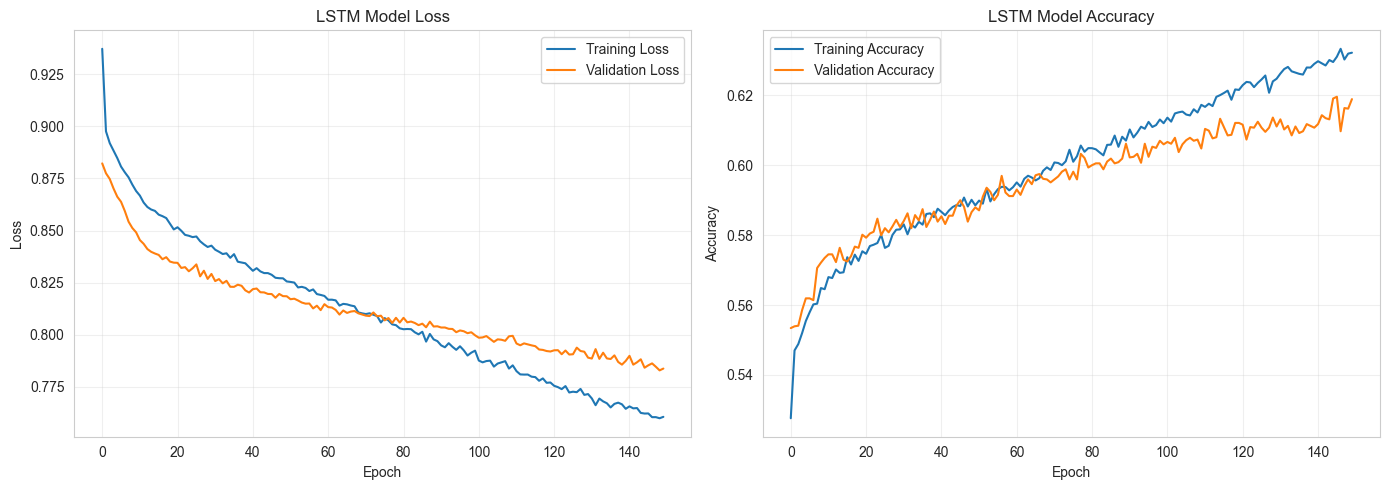

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(history_lstm.history['loss'], label='Training Loss')
axes[0].plot(history_lstm.history['val_loss'], label='Validation Loss')
axes[0].set_title('LSTM Model Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history_lstm.history['accuracy'], label='Training Accuracy')
axes[1].plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('LSTM Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


MODEL 3: Advanced DNN with Residual Blocks
Residual DNN Architecture:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 41)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 256)       │     10,752 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_8[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 256)       │     65,792 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_9[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 256)       │     65,792 │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_10[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256)       │          0 │ batch_normalizat… │
│                     │                   │            │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256)       │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 128)       │     32,896 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_11[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │     16,512 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_12[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 128)       │     32,896 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 128)       │          0 │ batch_normalizat… │
│                     │                   │            │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 128)       │          0 │ add_1[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 252,099 (984.76 KB)

 Trainable params: 249,795 (975.76 KB)

 Non-trainable params: 2,304 (9.00 KB)


🚀 Training Residual DNN...
Epoch 1/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.4773 - loss: 1.0398 - val_accuracy: 0.5305 - val_loss: 0.9251 - learning_rate: 0.0010
Epoch 2/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5329 - loss: 0.9130 - val_accuracy: 0.5531 - val_loss: 0.8899 - learning_rate: 0.0010
Epoch 3/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5457 - loss: 0.9011 - val_accuracy: 0.5585 - val_loss: 0.8795 - learning_rate: 0.0010
Epoch 4/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5468 - loss: 0.8955 - val_accuracy: 0.5567 - val_loss: 0.8754 - learning_rate: 0.0010
Epoch 5/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5513 - loss: 0.8892 - val_accuracy: 0.5623 - val_loss: 0.8692 - learning_rate: 0.0010
Epoch 6/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5549 - loss: 0.8842 - val_accuracy: 0.5599 - val_loss: 0.8667 - learning_rate: 0.0010
Epoch 7/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 13m

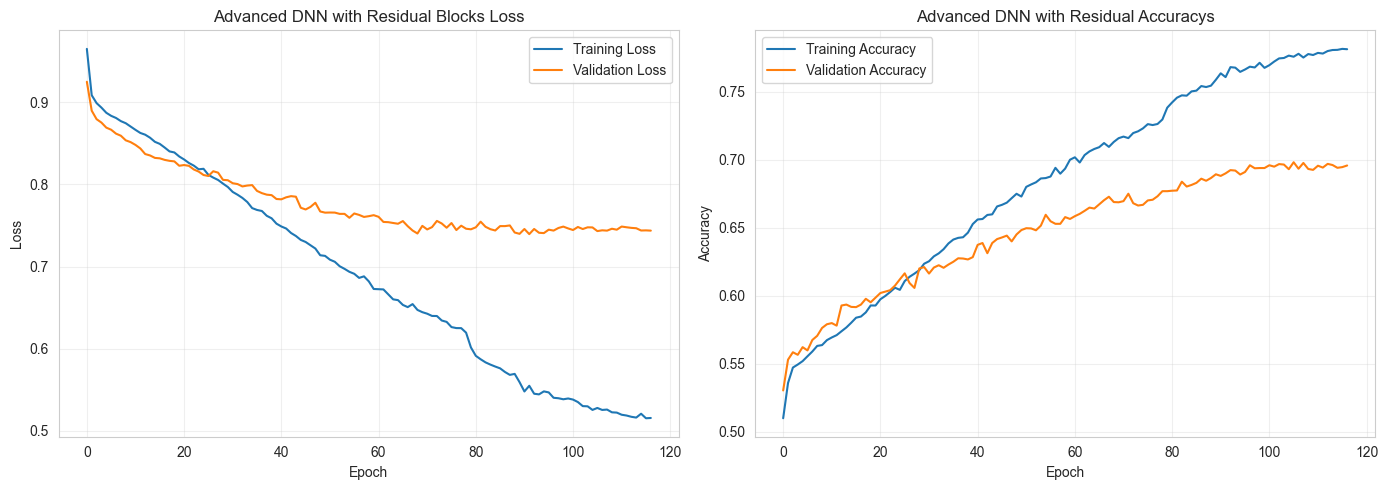

In [84]:
print("=" * 60)
print("MODEL 3: Advanced DNN with Residual Blocks")
print("=" * 60)

def residual_block(x, units, dropout_rate=0.3):
    """Residual block with skip connection"""
    shortcut = x
    x = layers.Dense(units, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(units, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    if shortcut.shape[-1] != units:
        shortcut = layers.Dense(units)(shortcut)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x


input_layer = layers.Input(shape=(X_train_dl.shape[1],))
x = layers.Dense(256, activation='relu')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = residual_block(x, 256, dropout_rate=0.3)
x = residual_block(x, 128, dropout_rate=0.25)
x = residual_block(x, 64, dropout_rate=0.2)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.15)(x)
output_layer = layers.Dense(3, activation='softmax')(x)

residual_model = keras.Model(inputs=input_layer, outputs=output_layer)
residual_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Residual DNN Architecture:")
residual_model.summary()


print("\n🚀 Training Residual DNN...")
history_residual = residual_model.fit(
    X_train_dl, y_train_categorical,
    validation_data=(X_val_dl, y_val_categorical),
    epochs=200,
    batch_size=256,
    callbacks=[
        callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True),
        callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)
    ],
    verbose=1
)


y_pred_proba_residual = residual_model.predict(X_test_dl, verbose=0)
y_pred_residual = np.argmax(y_pred_proba_residual, axis=1)
y_pred_residual_labels = le_dl.inverse_transform(y_pred_residual)

accuracy_residual = accuracy_score(y_test_final, y_pred_residual_labels)

print(f"\n✅ Residual DNN Accuracy: {accuracy_residual:.4f} ({accuracy_residual*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test_final, y_pred_residual_labels, target_names=['Away Win', 'Draw', 'Home Win']))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(history_residual.history['loss'], label='Training Loss')
axes[0].plot(history_residual.history['val_loss'], label='Validation Loss')
axes[0].set_title('Advanced DNN with Residual Blocks Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history_residual.history['accuracy'], label='Training Accuracy')
axes[1].plot(history_residual.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Advanced DNN with Residual Accuracys')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

